## Figure S4 Plot 
Using patchwork to combine the plots into a single figure for Manuscript

In [1]:
list_of_packages <- c(
    "ggplot2", # for plotting
    "dplyr", # for data manipulation
    "patchwork", # for combining plots
    "cowplot", # for combining plots
    "RcppTOML", # for reading TOML files
    "pheatmap", # for heatmaps
    "lattice", # for heatmaps
    "RColorBrewer", # for heatmaps
    "RColorBrewer", # for heatmaps
    "ComplexHeatmap", # for heatmaps
    "ggplotify", # for heatmaps
    "viridis", # for color palettes
    "platetools", # for plate visualization
    "circlize", # for plate visualization
    "reshape2", # for data manipulation
    "stringr", # for string manipulation
    "purrr" # for data manipulation
)
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            suppressMessages(
                library(package, character.only = TRUE)
            )
        )
    )
}

In [2]:
#  import the theme
source("../../utils/figure_themes.r")

In [3]:
# set the cell type
cell_type <- "PBMC"


In [4]:
# set the path to the data files
df_stats_path <- file.path(
    paste0("../../../6.bulk_Morphology_Elastic_Network/2.test_model/results/regression/",cell_type,"/aggregated_with_nomic/model_stats.csv"
    )
    )
df_variance_path <- file.path(
    paste0("../../../6.bulk_Morphology_Elastic_Network/2.test_model/results/regression/",cell_type,"/aggregated_with_nomic/variance_r2_stats.csv"
    )
)

# set the path to the figure output
enet_cp_fig_path <- paste0("../figures/regression/",cell_type,"/")
# if path does not exist, create it
if (!file.exists(dirname(enet_cp_fig_path))) {
    dir.create(dirname(enet_cp_fig_path), recursive = TRUE)
}

# read the data
df_stats <- read.csv(df_stats_path)
df_variance <- read.csv(df_variance_path)


In [5]:
head(df_stats)
head(df_variance)
# remove '[]' from the string in the column
df_variance$r2 <- gsub("\\[|\\]", "", df_variance$r2)
# set the column as numeric
df_variance$r2 <- as.numeric(df_variance$r2)
head(df_variance)


explained_variance neg_mean_absolute_error neg_mean_squared_error well
1 1                  -0.12876296             -0.016579900           B05 
2 1                  -0.09606601             -0.009228678           B08 
3 1                  -0.21557860             -0.046474132           B10 
4 1                  -0.57668367             -0.332564053           C02 
5 1                  -0.11961401             -0.014307512           C05 
6 1                  -0.31175502             -0.097191194           C06 
  treatment                            r2 cytokine data_split shuffle
1 LPS_Nigericin_100.000_1.0_DMSO_0.025 0  GFbeta   train_data final  
2 LPS_0.010_DMSO_0.025                 0  GFbeta   train_data final  
3 LPS_Nigericin_100.000_1.0_DMSO_0.025 0  GFbeta   train_data final  
4 LPS_0.100_DMSO_0.025                 0  GFbeta   train_data final  
5 LPS_Nigericin_100.000_3.0_DMSO_0.025 0  GFbeta   train_data final  
6 DMSO_0.100_DMSO_0.025                0  GFbeta   train_data final  
  predicted_value actual_value log10_neg_mean_absolute_error
1 0.4969174       0.6226146    0.8902090                    
2 0.4969174       0.4031387    1.0174302                    
3 0.4969174       0.7073632    0.6663944                    
4 0.4969174       0.1619233    0.2390623                    
5 0.4969174       0.6136835    0.9222179                    
6 0.4969174       0.1925851    0.5061865                    
  log10_neg_mean_squared_error log10_explained_variance
1 1.7804181                    0                       
2 2.0348605                    0                       
3 1.3327887                    0                       
4 0.4781247                    0                       
5 1.8444359                    0                       
6 1.0123731                    0

cytokine           data_split shuffle           predicted_value actual_value
1 XCL1(Lymphotactin) test_data  final             0.020480504     0.02890534  
2 XCL1(Lymphotactin) train_data final             0.019216161     0.03922649  
3 FGF-19             test_data  shuffled_baseline 0.011574992     0.04871310  
4 FGF-19             train_data shuffled_baseline 0.013018679     0.02982844  
5 IF-epsilon         test_data  final             0.006243045     0.03106936  
6 IF-epsilon         train_data final             0.007030569     0.03819321  
  r2           
1 [0.65955376] 
2 [0.59506056] 
3 [-0.12988404]
4 [-0.81728511]
5 [0.13484578] 
6 [0.31434654]

cytokine           data_split shuffle           predicted_value actual_value
1 XCL1(Lymphotactin) test_data  final             0.020480504     0.02890534  
2 XCL1(Lymphotactin) train_data final             0.019216161     0.03922649  
3 FGF-19             test_data  shuffled_baseline 0.011574992     0.04871310  
4 FGF-19             train_data shuffled_baseline 0.013018679     0.02982844  
5 IF-epsilon         test_data  final             0.006243045     0.03106936  
6 IF-epsilon         train_data final             0.007030569     0.03819321  
  r2        
1  0.6595538
2  0.5950606
3 -0.1298840
4 -0.8172851
5  0.1348458
6  0.3143465

In [6]:
df_variance$shuffle <- gsub("final", "Final\n ", df_variance$shuffle)
df_variance$shuffle <- gsub("shuffled_baseline", "Shuffled\nbaseline", df_variance$shuffle)
df_variance$data_split <- gsub("test_data", "Test Data", df_variance$data_split)
df_variance$data_split <- gsub("train_data", "Train Data", df_variance$data_split)

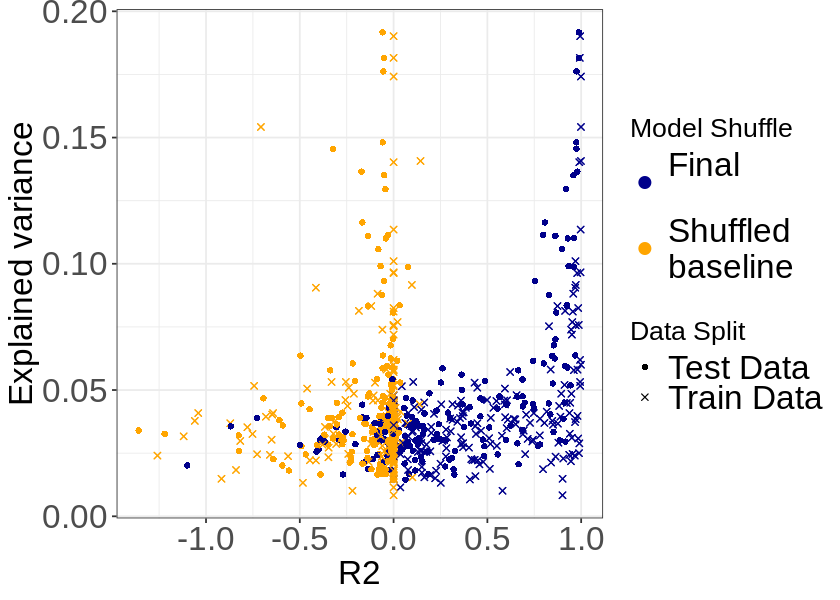

In [7]:
# set plot size 
options(repr.plot.width=7, repr.plot.height=5)
# set output path
global_variance_r2_path <- file.path(paste0(enet_cp_fig_path,"global_variance_r2.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_variance_r2_path))) {
    print(dirname(global_variance_r2_path))
    dir.create(dirname(global_variance_r2_path), recursive = TRUE)
}
# plot df_var df
variance_r2_plot_global <- (
    ggplot(df_variance, aes(x=r2, y=actual_value,col=shuffle, shape = data_split)) 
    + geom_point() 
    + theme_bw()
    + labs(x="R2", y="Explained variance") 
    # update the legend title
    + labs(shape = "Data Split", col = "Model Shuffle")
    # alter the text size of the legend title
    + figure_theme
    + scale_shape_manual(values=c(16, 4))
    # change the color of the points
    + scale_color_manual(values=c("Darkblue", "orange"))
    # legend position
    # + theme(legend.position = "bottom", legend.box = "horizontal")
    # change legend dot size
    + guides(colour = guide_legend(override.aes = list(size=3)))
)
variance_r2_plot_global
ggsave(global_variance_r2_path, variance_r2_plot_global, width=5, height=5, dpi=500)



In [8]:
df_stats$shuffle_plus_data_split <- paste0(df_stats$shuffle, "_", df_stats$data_split)
# replace 'final_test_data' with 'Final + Test' and 'final_train_data' with 'Final + Train' 
df_stats$shuffle_plus_data_split <- gsub("final_test_data", "Final (Test)", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("final_train_data", "Final (Train)", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("shuffled_baseline_test_data", "Shuffled (Test)", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("shuffled_baseline_train_data", "Shuffled (Train)", df_stats$shuffle_plus_data_split)


In [9]:
options(repr.plot.width=6, repr.plot.height=5)
# set output path
global_prediction_trend_path <- file.path(paste0(enet_cp_fig_path,"global_prediction_trend.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# plot the data
global_prediction_trend_scatter <- (
    ggplot(df_stats, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split))
    + geom_point(alpha=0.5, size=0.5) 
    + geom_smooth(method="lm", se=TRUE, alpha=0.5, size=0.5, color="black")

    # add geom smooth with each line being a different color
    + labs(x="Actual", y="Predicted") 
    + theme_bw()
    + labs(title="Global Prediction Trends of Cytokine Concentrations")
    # add y=x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed", color="black")
    + facet_wrap(.~shuffle_plus_data_split, ncol=2)
    + labs(color="Model", hjust=0.5)
    + figure_theme
    + scale_x_continuous(breaks = seq(0, 1, 0.5))
    # legend dot size
    + guides(colour = guide_legend(override.aes = list(size=5), ncol = 2))
    # legend position
    + theme(legend.position = "bottom", legend.box = "horizontal")
    # rotate x axis text
    + theme(axis.text.x = element_text(angle = 45, hjust = 1))
)

# save the plot
ggsave(global_prediction_trend_path, global_prediction_trend_scatter, width=5, height=5, dpi=500)
global_prediction_trend_scatter

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


In [10]:
head(df_stats)

explained_variance neg_mean_absolute_error neg_mean_squared_error well
1 1                  -0.12876296             -0.016579900           B05 
2 1                  -0.09606601             -0.009228678           B08 
3 1                  -0.21557860             -0.046474132           B10 
4 1                  -0.57668367             -0.332564053           C02 
5 1                  -0.11961401             -0.014307512           C05 
6 1                  -0.31175502             -0.097191194           C06 
  treatment                            r2 cytokine data_split shuffle
1 LPS_Nigericin_100.000_1.0_DMSO_0.025 0  GFbeta   train_data final  
2 LPS_0.010_DMSO_0.025                 0  GFbeta   train_data final  
3 LPS_Nigericin_100.000_1.0_DMSO_0.025 0  GFbeta   train_data final  
4 LPS_0.100_DMSO_0.025                 0  GFbeta   train_data final  
5 LPS_Nigericin_100.000_3.0_DMSO_0.025 0  GFbeta   train_data final  
6 DMSO_0.100_DMSO_0.025                0  GFbeta   train_data final  
  predicted_value actual_value log10_neg_mean_absolute_error
1 0.4969174       0.6226146    0.8902090                    
2 0.4969174       0.4031387    1.0174302                    
3 0.4969174       0.7073632    0.6663944                    
4 0.4969174       0.1619233    0.2390623                    
5 0.4969174       0.6136835    0.9222179                    
6 0.4969174       0.1925851    0.5061865                    
  log10_neg_mean_squared_error log10_explained_variance shuffle_plus_data_split
1 1.7804181                    0                        Final (Train)          
2 2.0348605                    0                        Final (Train)          
3 1.3327887                    0                        Final (Train)          
4 0.4781247                    0                        Final (Train)          
5 1.8444359                    0                        Final (Train)          
6 1.0123731                    0                        Final (Train)

In [11]:
# get only the final models
df_stats_final <- df_stats %>% filter(grepl("final", shuffle))
#  aggregate the data by the cytokine
df_stats_agg <- df_stats_final %>% 
    group_by(cytokine) %>% 
    summarise(
        mean_r2 = mean(r2),
        mean_neg_mean_squared_error = mean(neg_mean_squared_error),
        mean_log10_neg_mean_squared_error = mean(log10_neg_mean_squared_error),
        mean_actual_value = mean(actual_value),
        mean_predicted_value = mean(predicted_value)
    )
# sort the data by the log10_neg_mean_squared_error descending
df_stats_agg <- df_stats_agg[order(df_stats_agg$mean_neg_mean_squared_error),]
poor_performance_cytokines <- df_stats_agg$cytokine[1:9]
poor_performance_cytokines

[1] "BMP6"       "FGF-7(KGF)" "CXCL13"     "IL-1R1"     "IL-11"     
[6] "IL-27"      "BAFF"       "APRIL"      "CCL21"

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 110 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`).”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


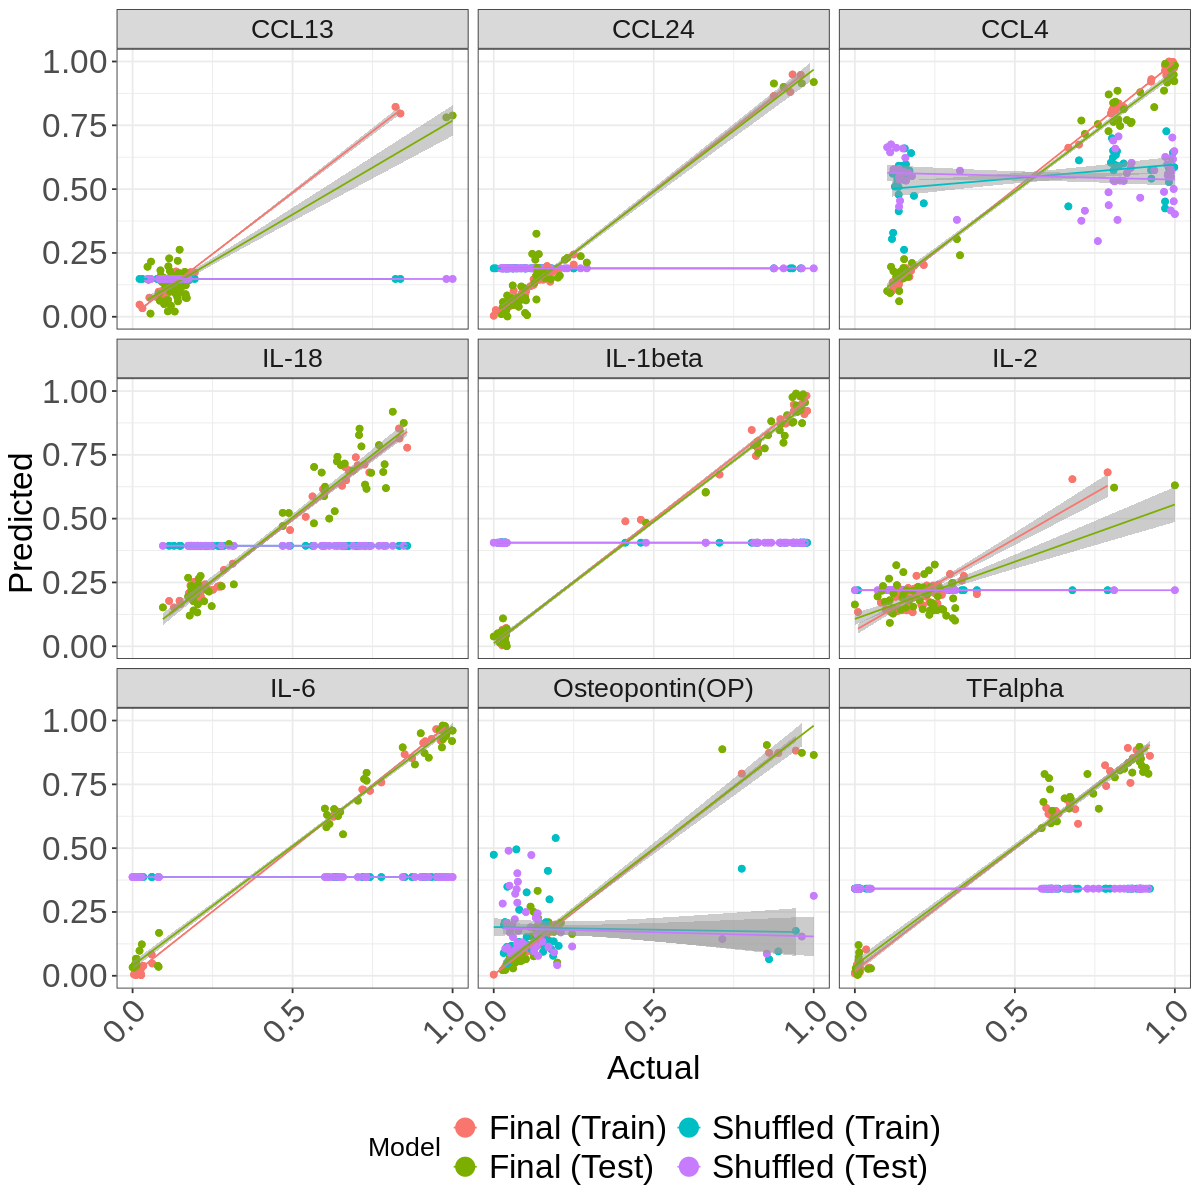

In [12]:
# df_stats factor levels
df_stats$shuffle_plus_data_split <- factor(
    df_stats$shuffle_plus_data_split,
    levels = c(
        "Final (Train)",
        "Final (Test)",
        "Shuffled (Train)",
        "Shuffled (Test)"
    )
)

enet_cp_fig <- file.path(paste0(enet_cp_fig_path,"Predicted_vs_Actual_all_cytokines.png"))
# set plot size
width <- 10
height <- 10
options(repr.plot.width=width, repr.plot.height=height)

# subset the df_stats to only include the cytokines of interest
cytokines <- c("IL-1beta", "TFalpha", "CCL24", "IL-18", "Osteopontin(OP)", "CCL13", "IL-2", "IL-6", "CCL4")
df_stats1 <- df_stats[df_stats$cytokine %in% cytokines,]

cytokine_predictions1 <- (
    ggplot(df_stats1, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split))
    + geom_point() 
    + theme_bw() 
    + geom_smooth(method=lm, se=TRUE, formula = y ~ x, alpha=0.5, size=0.5)
    + labs(x="Actual", y="Predicted ") 
    + ylim(0, 1)
    + xlim(0, 1)
    + figure_theme
    + labs(color="Model", hjust=0.5)
    # change legend title
    # make kegend key background white
    + guides(color = guide_legend(override.aes = list(fill = NA, size = 5), ncol = 2),
        linetype = guide_legend(override.aes = list(fill = NA)))
    + theme(legend.key = element_rect(fill = "white"))
    + facet_wrap(.~cytokine, ncol=3)
        # x tick marks
    + scale_x_continuous(breaks = seq(0, 1, 0.5))
    # legend position
    + theme(legend.position = "bottom", legend.box = "horizontal")
    # rotate x axis text
    + theme(axis.text.x = element_text(angle = 45, hjust = 1))
    # make the legend background white instead of grey
    + theme(legend.key=element_blank(), legend.background = element_blank())


    )
cytokine_predictions1


df_stats2 <- df_stats[df_stats$cytokine %in% poor_performance_cytokines,]

cytokine_predictions2 <- (
    ggplot(df_stats2, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split))
    + geom_point() 
    + theme_bw() 
    + geom_smooth(method=lm, se=TRUE, formula = y ~ x, alpha=0.5, size=0.5)
    + labs(x="Actual", y="Predicted ") 
    + ylim(0, 1)
    + xlim(0, 1)
    + figure_theme
    + labs(color="Model", hjust=0.5)
    # change legend title
    # make kegend key background white
    + guides(color = guide_legend(override.aes = list(fill = NA, size = 5), ncol = 2),
        linetype = guide_legend(override.aes = list(fill = NA)))
    + theme(legend.key = element_rect(fill = "white"))
    + facet_wrap(.~cytokine, ncol=3)
        # x tick marks
    + scale_x_continuous(breaks = seq(0, 1, 0.5))
    # legend position
    + theme(legend.position = "bottom", legend.box = "horizontal")
    # rotate x axis text

    )
cytokine_predictions2


## Coefficient Plots

In [13]:
# path set
input_file_path <- file.path(paste0("../../../6.bulk_Morphology_Elastic_Network/3.model_coefficients/results/regression/",cell_type))
# read in the data
output_path <- file.path(paste0("../figures/","regression/",cell_type,"/"))
# create output directory if it doesn't exist
dir.create(output_path, recursive = TRUE, showWarnings = FALSE)


In [14]:
## function to process the data for visualization
process_subset_data <- function(df){
    # read in the data
    # data <- read.csv(data_path, header = TRUE, sep = ",", stringsAsFactors = FALSE)
    # get the basename of the files

    data <- df %>%
        dplyr::arrange(desc(abs(coefficients))) %>%
        tidyr::separate(
            feature_names,
            into = c(
                "compartment",
                "feature_group",
                "measurement",
                "channel", 
                "parameter1", 
                "parameter2"
            ),
            sep = "_",
            remove = FALSE
        ) %>%
        dplyr::mutate(channel_cleaned = channel) %>%
        dplyr::arrange(desc(abs(coefficients)))

    # Clean channel for visualization
    data$channel_learned <- dplyr::recode(data$channel,
            "CorrDNA" = "nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "gasdermin",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )
    data <- data %>%
        dplyr::group_by(feature_group, channel_learned, compartment) %>%
        dplyr::slice_max(order_by = coefficients, n = 1)
    return(data)
}


In [15]:
plot_coeffs <- function(df, cytokine, shuffle){
    # replace "[NSU]" with "" 
    cytokine <- gsub("\\[NSU\\]", "", cytokine)
    r2 <- unique(df$r2)
    # plot the data
    coef_gg <- (
        ggplot(df, aes(x = channel_learned, y = feature_group))
        + geom_point(aes(fill = abs(coefficients)), pch = 22, size = 8.5)
        + facet_wrap("~compartment", ncol = 3)
        + theme_bw()
        + ggtitle(paste0("R2: ", round(r2,2)))
        + scale_fill_continuous(
            name=paste0(cytokine,"\ntop Abs. val\ntreatment\n model\ncoefficient"),
            low = "darkblue",
            high = "yellow",
        )
        + xlab("Channel")
        + ylab("Feature")
        
        + figure_theme
        + theme(
            axis.text.x = element_text(angle = 90, hjust = 1, size = 20),
            # title size
            plot.title = element_text(size = 20)
        )
        
        # rotate x axis labels
        + theme(plot.title = element_text(hjust = 0.5))
        )
        return(coef_gg)
    }


In [16]:
# get all files in a directory
files <- list.files(path = input_file_path, pattern = "*.csv", full.names = TRUE)

# create empty list (mimics a dictionary )
nested_list <- list(
        filename = list(),
        cytokine = list(),
        shuffle = list()
    )

for (i in files){
    filename <- basename(i)
    # split the string at the first _
    filename <- strsplit(filename, "_", fixed = TRUE)[[1]]
    cytokine <- filename[1]
    shuffle <- filename[2]
    nested_list$filename <- c(nested_list$filename, i)
    nested_list$cytokine <- c(nested_list$cytokine, cytokine)
    nested_list$shuffle <- c(nested_list$shuffle, shuffle)
}


### IL-1 beta

In [17]:
cytokine <- 'IL-1 beta [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]
il1beta_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)

il1beta_final <- process_subset_data(il1beta_final)
head(il1beta_final)
# factor levels
# rename the factor levels
il1beta_final$channel_learned <- factor(
    il1beta_final$channel_learned,
    levels = c(
        "nuclei",
        "Mito",
        "ER",
        "gasdermin",
        "PM",
        "other"
    ),
    labels = c(
        "Nuclei",
        "Mito",
        "ER",
        "GasderminD",
        "AGP",
        "Other"
    )
)
il1beta_final$feature_group <- factor(
    il1beta_final$feature_group,
    levels = c(
        "AreaShape",
        "Correlation",
        "Granularity",
        "Intensity",
        "Location",
        "Neighbors",
        "RadialDistribution",
        "Texture"
    )
)
# reverese the order of the factor levels
il1beta_final$feature_group <- factor(
    il1beta_final$feature_group,
    levels = rev(levels(il1beta_final$feature_group))
)

il1beta_final_plot <- plot_coeffs(il1beta_final, cytokine, shuffle)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 8.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, il1beta_final_plot, width=width, height=height, dpi=500)
il1beta_final_plot


Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [4, 11, 16, 18, 21,
22, 24, 29, 31, 36, 37, 38, 40, 43, 44, 45, 48, 63, 69, 74, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 3, 5, 7,
8, 10, 12, 13, 14, 15, 17, 20, 23, 25, 26, 27, 28, 30, 33, ...].”


feature_names                                   compartment feature_group
1 Cells_AreaShape_Eccentricity                    Cells       AreaShape    
2 Cytoplasm_AreaShape_Zernike_4_2                 Cytoplasm   AreaShape    
3 Nuclei_AreaShape_Zernike_2_2                    Nuclei      AreaShape    
4 Cells_Correlation_RWC_CorrER_CorrGasdermin      Cells       Correlation  
5 Cytoplasm_Correlation_RWC_CorrER_CorrGasdermin  Cytoplasm   Correlation  
6 Nuclei_Correlation_Overlap_CorrER_CorrGasdermin Nuclei      Correlation  
  measurement  channel parameter1    parameter2 coefficients secreted_proteins
1 Eccentricity NA      NA            NA         0.05054884   IL-1 beta [NSU]  
2 Zernike      4       2             NA         0.04660258   IL-1 beta [NSU]  
3 Zernike      2       2             NA         0.08209294   IL-1 beta [NSU]  
4 RWC          CorrER  CorrGasdermin NA         0.10411036   IL-1 beta [NSU]  
5 RWC          CorrER  CorrGasdermin NA         0.10697676   IL-1 beta [NSU]  
6 Overlap      CorrER  CorrGasdermin NA         0.04205716   IL-1 beta [NSU]  
  shuffle cell_type alpha l1_ratio r2        channel_cleaned channel_learned
1 final   PBMC      0.001 0.01     0.9794407 NA              other          
2 final   PBMC      0.001 0.01     0.9794407 4               other          
3 final   PBMC      0.001 0.01     0.9794407 2               other          
4 final   PBMC      0.001 0.01     0.9794407 CorrER          ER             
5 final   PBMC      0.001 0.01     0.9794407 CorrER          ER             
6 final   PBMC      0.001 0.01     0.9794407 CorrER          ER

### TNF alpha

Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [7, 11, 18, 20, 21,
22, 34, 36, 38, 39, 41, 48, 49, 52, 59, 79, 85, 86, 87, 101, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 4, 5, 6,
8, 9, 10, 13, 14, 15, 16, 17, 19, 23, 24, 25, 26, 27, 28, ...].”


feature_names                                   compartment feature_group
1 Cells_AreaShape_Eccentricity                    Cells       AreaShape    
2 Cytoplasm_AreaShape_Zernike_4_2                 Cytoplasm   AreaShape    
3 Nuclei_AreaShape_Zernike_2_2                    Nuclei      AreaShape    
4 Cells_Correlation_Correlation_CorrER_CorrPM     Cells       Correlation  
5 Cytoplasm_Correlation_RWC_CorrER_CorrGasdermin  Cytoplasm   Correlation  
6 Nuclei_Correlation_Overlap_CorrER_CorrGasdermin Nuclei      Correlation  
  measurement  channel parameter1    parameter2 coefficients secreted_proteins
1 Eccentricity NA      NA            NA         0.07911263   TNF alpha [NSU]  
2 Zernike      4       2             NA         0.05311705   TNF alpha [NSU]  
3 Zernike      2       2             NA         0.12472823   TNF alpha [NSU]  
4 Correlation  CorrER  CorrPM        NA         0.05759728   TNF alpha [NSU]  
5 RWC          CorrER  CorrGasdermin NA         0.02283605   TNF alpha [NSU]  
6 Overlap      CorrER  CorrGasdermin NA         0.02123263   TNF alpha [NSU]  
  shuffle cell_type alpha l1_ratio r2        channel_cleaned channel_learned
1 final   PBMC      0.001 0.01     0.9817693 NA              other          
2 final   PBMC      0.001 0.01     0.9817693 4               other          
3 final   PBMC      0.001 0.01     0.9817693 2               other          
4 final   PBMC      0.001 0.01     0.9817693 CorrER          ER             
5 final   PBMC      0.001 0.01     0.9817693 CorrER          ER             
6 final   PBMC      0.001 0.01     0.9817693 CorrER          ER

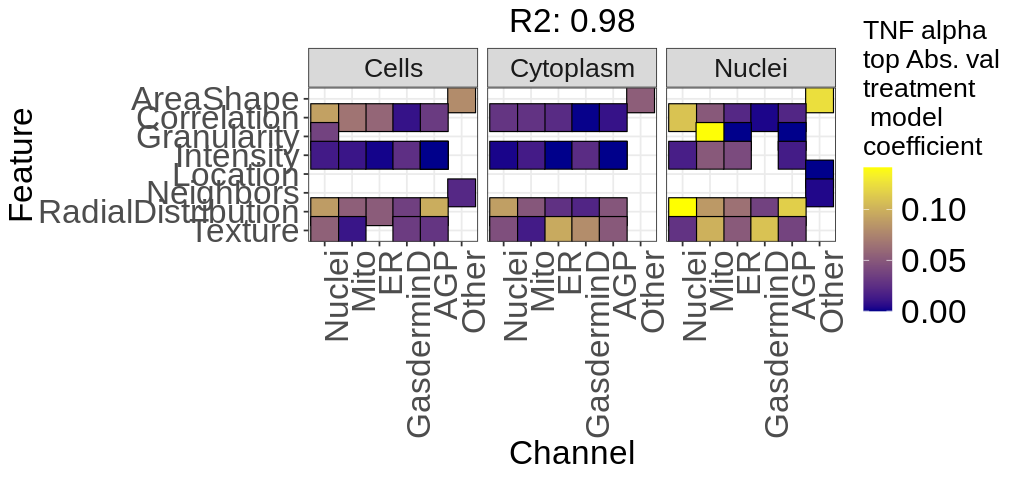

In [18]:
cytokine <- 'TNF alpha [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]
tnfa_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)

tnfa_final <- process_subset_data(tnfa_final)
head(tnfa_final)
# factor levels
# rename the factor levels
tnfa_final$channel_learned <- factor(
    tnfa_final$channel_learned,
    levels = c(
        "nuclei",
        "Mito",
        "ER",
        "gasdermin",
        "PM",
        "other"
    ),
    labels = c(
        "Nuclei",
        "Mito",
        "ER",
        "GasderminD",
        "AGP",
        "Other"
    )
)
tnfa_final$feature_group <- factor(
    tnfa_final$feature_group,
    levels = c(
        "AreaShape",
        "Correlation",
        "Granularity",
        "Intensity",
        "Location",
        "Neighbors",
        "RadialDistribution",
        "Texture"
    )
)
# reverese the order of the factor levels
tnfa_final$feature_group <- factor(
    tnfa_final$feature_group,
    levels = rev(levels(tnfa_final$feature_group))
)

tnfa_final_plot <- plot_coeffs(tnfa_final, cytokine, shuffle)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 8.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, tnfa_final_plot, width=width, height=height, dpi=500)
tnfa_final_plot


### CCL24

Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [5, 20, 22, 23, 30,
34, 40, 44, 46, 48, 52, 53, 57, 58, 59, 62, 67, 68, 72, 75, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 3, 4, 6,
7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 25, 29, ...].”


feature_names                               compartment feature_group
1 Cells_AreaShape_MeanRadius                  Cells       AreaShape    
2 Cytoplasm_AreaShape_Zernike_6_2             Cytoplasm   AreaShape    
3 Nuclei_AreaShape_MinorAxisLength            Nuclei      AreaShape    
4 Cells_Correlation_Correlation_CorrER_CorrPM Cells       Correlation  
5 Cells_Correlation_RWC_CorrER_CorrGasdermin  Cells       Correlation  
6 Cytoplasm_Correlation_RWC_CorrER_CorrDNA    Cytoplasm   Correlation  
  measurement     channel parameter1    parameter2 coefficients
1 MeanRadius      NA      NA            NA         0.11013980  
2 Zernike         6       2             NA         0.12796164  
3 MinorAxisLength NA      NA            NA         0.09101962  
4 Correlation     CorrER  CorrPM        NA         0.00000000  
5 RWC             CorrER  CorrGasdermin NA         0.00000000  
6 RWC             CorrER  CorrDNA       NA         0.09213212  
  secreted_proteins shuffle cell_type alpha l1_ratio r2        channel_cleaned
1 CCL24 [NSU]       final   PBMC      0.001 0.01     0.8383504 NA             
2 CCL24 [NSU]       final   PBMC      0.001 0.01     0.8383504 6              
3 CCL24 [NSU]       final   PBMC      0.001 0.01     0.8383504 NA             
4 CCL24 [NSU]       final   PBMC      0.001 0.01     0.8383504 CorrER         
5 CCL24 [NSU]       final   PBMC      0.001 0.01     0.8383504 CorrER         
6 CCL24 [NSU]       final   PBMC      0.001 0.01     0.8383504 CorrER         
  channel_learned
1 other          
2 other          
3 other          
4 ER             
5 ER             
6 ER

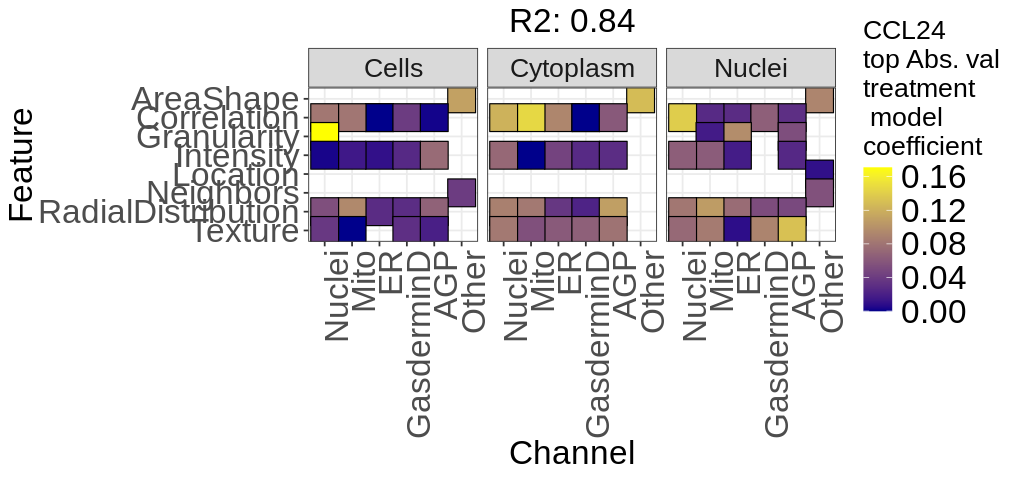

In [19]:
cytokine <- 'CCL24 [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]
CCL24_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)

CCL24_final <- process_subset_data(CCL24_final)
head(CCL24_final)
# factor levels
# rename the factor levels
CCL24_final$channel_learned <- factor(
    CCL24_final$channel_learned,
    levels = c(
        "nuclei",
        "Mito",
        "ER",
        "gasdermin",
        "PM",
        "other"
    ),
    labels = c(
        "Nuclei",
        "Mito",
        "ER",
        "GasderminD",
        "AGP",
        "Other"
    )
)
CCL24_final$feature_group <- factor(
    CCL24_final$feature_group,
    levels = c(
        "AreaShape",
        "Correlation",
        "Granularity",
        "Intensity",
        "Location",
        "Neighbors",
        "RadialDistribution",
        "Texture"
    )
)
# reverese the order of the factor levels
CCL24_final$feature_group <- factor(
    CCL24_final$feature_group,
    levels = rev(levels(CCL24_final$feature_group))
)

CCL24_final_plot <- plot_coeffs(CCL24_final, cytokine, shuffle)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 8.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, CCL24_final_plot, width=width, height=height, dpi=500)
CCL24_final_plot


### IL-18

Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [3, 4, 6, 7, 10, 13,
18, 21, 23, 27, 28, 29, 31, 34, 37, 39, 40, 42, 46, 48, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 5, 8, 9,
11, 12, 14, 15, 16, 19, 20, 22, 24, 25, 32, 33, 35, 36, 41, ...].”


feature_names               compartment feature_group measurement channel
1 Cells_AreaShape_Zernike_3_1 Cells       AreaShape     Zernike     3      
2 Cells_AreaShape_Zernike_5_3 Cells       AreaShape     Zernike     5      
3 Cells_AreaShape_Zernike_5_1 Cells       AreaShape     Zernike     5      
4 Cells_AreaShape_Zernike_4_4 Cells       AreaShape     Zernike     4      
5 Cells_AreaShape_Zernike_4_2 Cells       AreaShape     Zernike     4      
6 Cells_AreaShape_Zernike_4_0 Cells       AreaShape     Zernike     4      
  parameter1 parameter2 coefficients secreted_proteins shuffle cell_type alpha
1 1          NA         0            IL-18 [NSU]       final   PBMC      0.001
2 3          NA         0            IL-18 [NSU]       final   PBMC      0.001
3 1          NA         0            IL-18 [NSU]       final   PBMC      0.001
4 4          NA         0            IL-18 [NSU]       final   PBMC      0.001
5 2          NA         0            IL-18 [NSU]       final   PBMC      0.001
6 0          NA         0            IL-18 [NSU]       final   PBMC      0.001
  l1_ratio r2        channel_cleaned channel_learned
1 0.2      0.9029778 3               other          
2 0.2      0.9029778 5               other          
3 0.2      0.9029778 5               other          
4 0.2      0.9029778 4               other          
5 0.2      0.9029778 4               other          
6 0.2      0.9029778 4               other

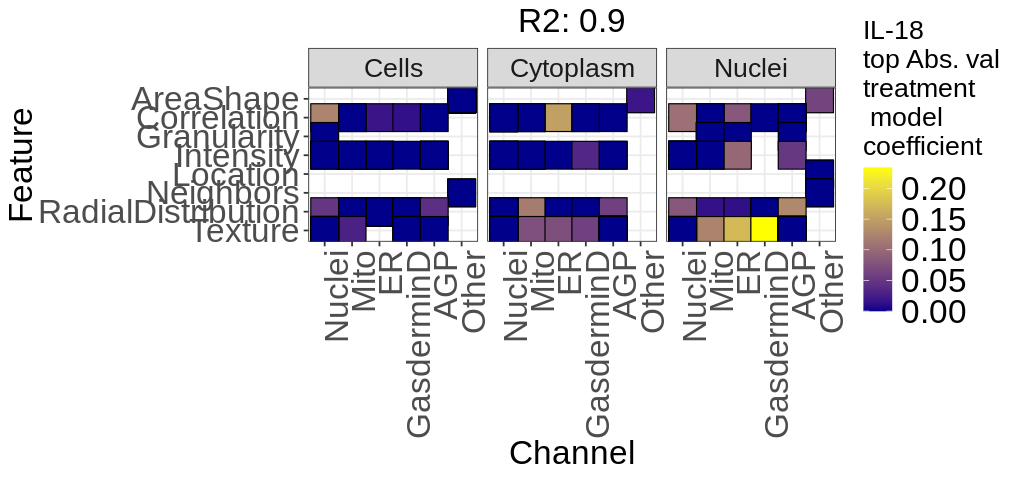

In [20]:
cytokine <- 'IL-18 [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]
il18beta_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)

il18beta_final <- process_subset_data(il18beta_final)
head(il18beta_final)
# factor levels
# rename the factor levels
il18beta_final$channel_learned <- factor(
    il18beta_final$channel_learned,
    levels = c(
        "nuclei",
        "Mito",
        "ER",
        "gasdermin",
        "PM",
        "other"
    ),
    labels = c(
        "Nuclei",
        "Mito",
        "ER",
        "GasderminD",
        "AGP",
        "Other"
    )
)
il18beta_final$feature_group <- factor(
    il18beta_final$feature_group,
    levels = c(
        "AreaShape",
        "Correlation",
        "Granularity",
        "Intensity",
        "Location",
        "Neighbors",
        "RadialDistribution",
        "Texture"
    )
)
# reverese the order of the factor levels
il18beta_final$feature_group <- factor(
    il18beta_final$feature_group,
    levels = rev(levels(il18beta_final$feature_group))
)

il18beta_final_plot <- plot_coeffs(il18beta_final, cytokine, shuffle)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 8.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, il18beta_final_plot, width=width, height=height, dpi=500)
il18beta_final_plot


### Osteopontin

Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [3, 13, 16, 18, 21,
30, 36, 43, 44, 66, 69, 70, 73, 75, 83, 85, 88, 94, 100, 102, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 4, 5, 6,
7, 8, 9, 10, 11, 12, 14, 15, 17, 20, 22, 23, 24, 25, 26, ...].”


feature_names                                  compartment feature_group
1 Cells_AreaShape_MeanRadius                     Cells       AreaShape    
2 Cytoplasm_AreaShape_MinorAxisLength            Cytoplasm   AreaShape    
3 Nuclei_AreaShape_MinorAxisLength               Nuclei      AreaShape    
4 Cells_Correlation_Correlation_CorrER_CorrPM    Cells       Correlation  
5 Cells_Correlation_Overlap_CorrER_CorrGasdermin Cells       Correlation  
6 Cells_Correlation_RWC_CorrER_CorrGasdermin     Cells       Correlation  
  measurement     channel parameter1    parameter2 coefficients
1 MeanRadius      NA      NA            NA         0.1331478   
2 MinorAxisLength NA      NA            NA         0.1675414   
3 MinorAxisLength NA      NA            NA         0.1476156   
4 Correlation     CorrER  CorrPM        NA         0.0000000   
5 Overlap         CorrER  CorrGasdermin NA         0.0000000   
6 RWC             CorrER  CorrGasdermin NA         0.0000000   
  secreted_proteins       shuffle cell_type alpha l1_ratio r2       
1 Osteopontin (OPN) [NSU] final   PBMC      0.001 0.1      0.9095458
2 Osteopontin (OPN) [NSU] final   PBMC      0.001 0.1      0.9095458
3 Osteopontin (OPN) [NSU] final   PBMC      0.001 0.1      0.9095458
4 Osteopontin (OPN) [NSU] final   PBMC      0.001 0.1      0.9095458
5 Osteopontin (OPN) [NSU] final   PBMC      0.001 0.1      0.9095458
6 Osteopontin (OPN) [NSU] final   PBMC      0.001 0.1      0.9095458
  channel_cleaned channel_learned
1 NA              other          
2 NA              other          
3 NA              other          
4 CorrER          ER             
5 CorrER          ER             
6 CorrER          ER

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


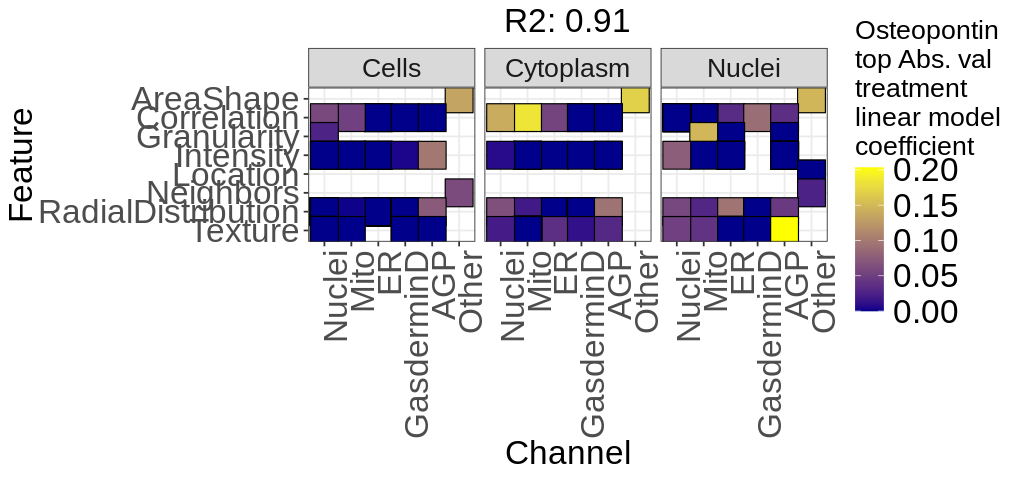

In [21]:
cytokine <- 'Osteopontin (OPN) [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]
op_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)

op_final <- process_subset_data(op_final)
# replace (OPN with "" in the cytokine column)
# op_final$secreted_proteins <- stringr::str_replace_all(op_final$secreted_proteins, "Osteopontin (OPN) [NSU]", "Osteopontin [NSU]")
head(op_final)
# factor levels
# rename the factor levels
op_final$channel_learned <- factor(
    op_final$channel_learned,
    levels = c(
        "nuclei",
        "Mito",
        "ER",
        "gasdermin",
        "PM",
        "other"
    ),
    labels = c(
        "Nuclei",
        "Mito",
        "ER",
        "GasderminD",
        "AGP",
        "Other"
    )
)
op_final$feature_group <- factor(
    op_final$feature_group,
    levels = c(
        "AreaShape",
        "Correlation",
        "Granularity",
        "Intensity",
        "Location",
        "Neighbors",
        "RadialDistribution",
        "Texture"
    )
)
# reverese the order of the factor levels
op_final$feature_group <- factor(
    op_final$feature_group,
    levels = rev(levels(op_final$feature_group))
)

op_final_plot <- plot_coeffs(op_final, cytokine, shuffle)
op_final_plot <- (
    op_final_plot
    + scale_fill_continuous(
            name=paste0("Osteopontin","\ntop Abs. val\ntreatment\nlinear model\ncoefficient"),
            low = "darkblue",
            high = "yellow",
        )
)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 8.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, op_final_plot, width=width, height=height, dpi=500)
op_final_plot


### CCL13

Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [15, 18, 36, 37, 47,
62, 70, 72, 76, 83, 91, 95, 98, 100, 104, 107, 108, 112, 116, 123, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 3, 4, 5,
6, 7, 10, 11, 12, 13, 14, 16, 19, 20, 21, 22, 24, 25, 26, ...].”


feature_names                               compartment feature_group
1 Cells_AreaShape_Zernike_1_1                 Cells       AreaShape    
2 Cytoplasm_AreaShape_Zernike_3_1             Cytoplasm   AreaShape    
3 Nuclei_AreaShape_Zernike_1_1                Nuclei      AreaShape    
4 Cells_Correlation_Correlation_CorrER_CorrPM Cells       Correlation  
5 Cytoplasm_Correlation_RWC_CorrER_CorrDNA    Cytoplasm   Correlation  
6 Nuclei_Correlation_K_CorrER_CorrPM          Nuclei      Correlation  
  measurement channel parameter1 parameter2 coefficients secreted_proteins
1 Zernike     1       1          NA         0.042939985  CCL13 [NSU]      
2 Zernike     3       1          NA         0.057671201  CCL13 [NSU]      
3 Zernike     1       1          NA         0.056698004  CCL13 [NSU]      
4 Correlation CorrER  CorrPM     NA         0.022050491  CCL13 [NSU]      
5 RWC         CorrER  CorrDNA    NA         0.091219855  CCL13 [NSU]      
6 K           CorrER  CorrPM     NA         0.008780563  CCL13 [NSU]      
  shuffle cell_type alpha l1_ratio r2        channel_cleaned channel_learned
1 final   PBMC      0.001 0.01     0.8220764 1               other          
2 final   PBMC      0.001 0.01     0.8220764 3               other          
3 final   PBMC      0.001 0.01     0.8220764 1               other          
4 final   PBMC      0.001 0.01     0.8220764 CorrER          ER             
5 final   PBMC      0.001 0.01     0.8220764 CorrER          ER             
6 final   PBMC      0.001 0.01     0.8220764 CorrER          ER

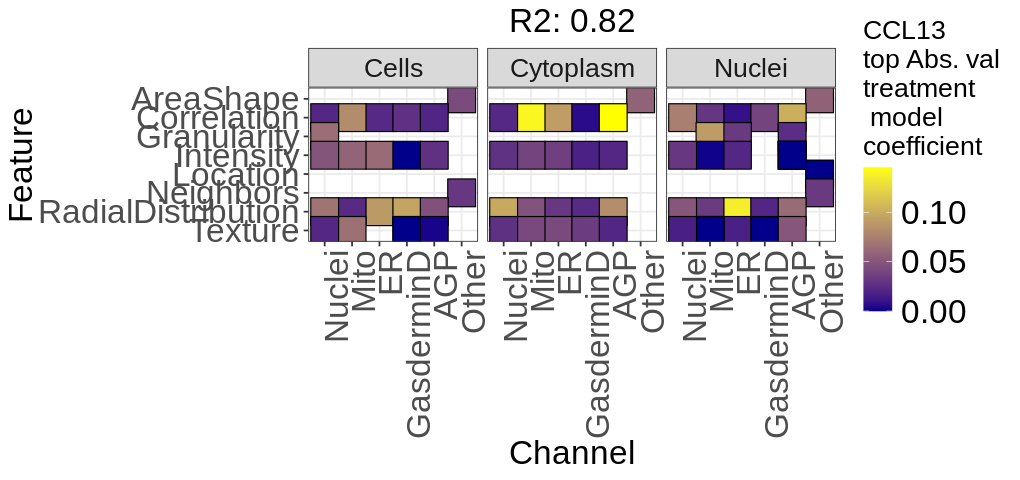

In [22]:
cytokine <- 'CCL13 [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]
CCL13_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)

CCL13_final <- process_subset_data(CCL13_final)
head(CCL13_final)
# factor levels
# rename the factor levels
CCL13_final$channel_learned <- factor(
    CCL13_final$channel_learned,
    levels = c(
        "nuclei",
        "Mito",
        "ER",
        "gasdermin",
        "PM",
        "other"
    ),
    labels = c(
        "Nuclei",
        "Mito",
        "ER",
        "GasderminD",
        "AGP",
        "Other"
    )
)
CCL13_final$feature_group <- factor(
    CCL13_final$feature_group,
    levels = c(
        "AreaShape",
        "Correlation",
        "Granularity",
        "Intensity",
        "Location",
        "Neighbors",
        "RadialDistribution",
        "Texture"
    )
)
# reverese the order of the factor levels
CCL13_final$feature_group <- factor(
    CCL13_final$feature_group,
    levels = rev(levels(CCL13_final$feature_group))
)

CCL13_final_plot <- plot_coeffs(CCL13_final, cytokine, shuffle)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 8.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, CCL13_final_plot, width=width, height=height, dpi=500)
CCL13_final_plot


### IL-2

In [23]:
cytokine <- 'IL-2 [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]
il2_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)

il2_final <- process_subset_data(il2_final)
head(il2_final)
# factor levels
# rename the factor levels
il2_final$channel_learned <- factor(
    il2_final$channel_learned,
    levels = c(
        "nuclei",
        "Mito",
        "ER",
        "gasdermin",
        "PM",
        "other"
    ),
    labels = c(
        "Nuclei",
        "Mito",
        "ER",
        "GasderminD",
        "AGP",
        "Other"
    )
)
il2_final$feature_group <- factor(
    il2_final$feature_group,
    levels = c(
        "AreaShape",
        "Correlation",
        "Granularity",
        "Intensity",
        "Location",
        "Neighbors",
        "RadialDistribution",
        "Texture"
    )
)
# reverese the order of the factor levels
il2_final$feature_group <- factor(
    il2_final$feature_group,
    levels = rev(levels(il2_final$feature_group))
)

il2_final_plot <- plot_coeffs(il2_final, cytokine, shuffle)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 8.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, il2_final_plot, width=width, height=height, dpi=500)
il2_final_plot


Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [22, 31, 32, 36, 49,
50, 51, 61, 73, 74, 75, 77, 385, 386, 387, 388, 389, 390, 391, 392, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 3, 4, 5,
7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, ...].”


feature_names               compartment feature_group measurement channel
1 Cells_AreaShape_Zernike_9_9 Cells       AreaShape     Zernike     9      
2 Cells_AreaShape_Zernike_9_7 Cells       AreaShape     Zernike     9      
3 Cells_AreaShape_Zernike_9_5 Cells       AreaShape     Zernike     9      
4 Cells_AreaShape_Zernike_9_3 Cells       AreaShape     Zernike     9      
5 Cells_AreaShape_Zernike_9_1 Cells       AreaShape     Zernike     9      
6 Cells_AreaShape_Zernike_8_8 Cells       AreaShape     Zernike     8      
  parameter1 parameter2 coefficients secreted_proteins shuffle cell_type alpha
1 9          NA         0            IL-2 [NSU]        final   PBMC      0.001
2 7          NA         0            IL-2 [NSU]        final   PBMC      0.001
3 5          NA         0            IL-2 [NSU]        final   PBMC      0.001
4 3          NA         0            IL-2 [NSU]        final   PBMC      0.001
5 1          NA         0            IL-2 [NSU]        final   PBMC      0.001
6 8          NA         0            IL-2 [NSU]        final   PBMC      0.001
  l1_ratio r2        channel_cleaned channel_learned
1 0.5      0.4528357 9               other          
2 0.5      0.4528357 9               other          
3 0.5      0.4528357 9               other          
4 0.5      0.4528357 9               other          
5 0.5      0.4528357 9               other          
6 0.5      0.4528357 8               other

### IL-6

Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [6, 8, 33, 35, 39,
46, 50, 53, 58, 63, 67, 68, 69, 70, 71, 76, 79, 83, 86, 95, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 3, 4, 5,
7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, ...].”


feature_names                                   compartment feature_group
1 Cells_AreaShape_Eccentricity                    Cells       AreaShape    
2 Cytoplasm_AreaShape_Zernike_4_2                 Cytoplasm   AreaShape    
3 Nuclei_AreaShape_Zernike_2_2                    Nuclei      AreaShape    
4 Cells_Correlation_Overlap_CorrER_CorrGasdermin  Cells       Correlation  
5 Cytoplasm_Correlation_RWC_CorrER_CorrGasdermin  Cytoplasm   Correlation  
6 Nuclei_Correlation_Overlap_CorrER_CorrGasdermin Nuclei      Correlation  
  measurement  channel parameter1    parameter2 coefficients secreted_proteins
1 Eccentricity NA      NA            NA         0.07537595   IL-6 [NSU]       
2 Zernike      4       2             NA         0.05137321   IL-6 [NSU]       
3 Zernike      2       2             NA         0.11514579   IL-6 [NSU]       
4 Overlap      CorrER  CorrGasdermin NA         0.03373072   IL-6 [NSU]       
5 RWC          CorrER  CorrGasdermin NA         0.03070555   IL-6 [NSU]       
6 Overlap      CorrER  CorrGasdermin NA         0.05342922   IL-6 [NSU]       
  shuffle cell_type alpha l1_ratio r2        channel_cleaned channel_learned
1 final   PBMC      0.001 0.01     0.9777152 NA              other          
2 final   PBMC      0.001 0.01     0.9777152 4               other          
3 final   PBMC      0.001 0.01     0.9777152 2               other          
4 final   PBMC      0.001 0.01     0.9777152 CorrER          ER             
5 final   PBMC      0.001 0.01     0.9777152 CorrER          ER             
6 final   PBMC      0.001 0.01     0.9777152 CorrER          ER

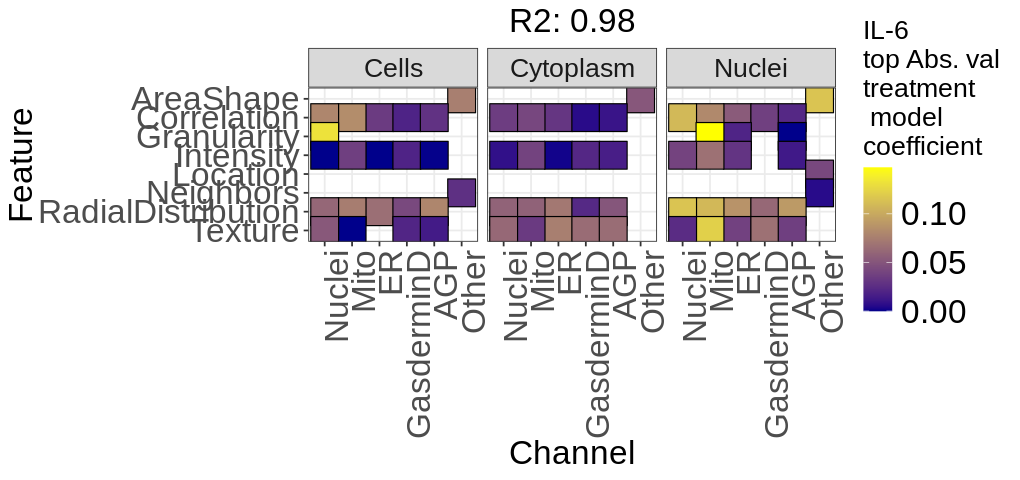

In [24]:
cytokine <- 'IL-6 [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]
il6_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)

il6_final <- process_subset_data(il6_final)
head(il6_final)
# factor levels
# rename the factor levels
il6_final$channel_learned <- factor(
    il6_final$channel_learned,
    levels = c(
        "nuclei",
        "Mito",
        "ER",
        "gasdermin",
        "PM",
        "other"
    ),
    labels = c(
        "Nuclei",
        "Mito",
        "ER",
        "GasderminD",
        "AGP",
        "Other"
    )
)
il6_final$feature_group <- factor(
    il6_final$feature_group,
    levels = c(
        "AreaShape",
        "Correlation",
        "Granularity",
        "Intensity",
        "Location",
        "Neighbors",
        "RadialDistribution",
        "Texture"
    )
)
# reverese the order of the factor levels
il6_final$feature_group <- factor(
    il6_final$feature_group,
    levels = rev(levels(il6_final$feature_group))
)

il6_final_plot <- plot_coeffs(il6_final, cytokine, shuffle)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 8.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, il6_final_plot, width=width, height=height, dpi=500)
il6_final_plot


### CCL4

Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [9, 21, 23, 36, 38,
51, 53, 54, 56, 59, 61, 66, 67, 68, 72, 78, 86, 90, 93, 96, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 3, 4, 5,
6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, ...].”


feature_names                                       compartment feature_group
1 Cells_AreaShape_Compactness                         Cells       AreaShape    
2 Cytoplasm_AreaShape_MajorAxisLength                 Cytoplasm   AreaShape    
3 Nuclei_AreaShape_MajorAxisLength                    Nuclei      AreaShape    
4 Cells_Correlation_Overlap_CorrER_CorrGasdermin      Cells       Correlation  
5 Cytoplasm_Correlation_RWC_CorrER_CorrGasdermin      Cytoplasm   Correlation  
6 Nuclei_Correlation_Correlation_CorrER_CorrGasdermin Nuclei      Correlation  
  measurement     channel parameter1    parameter2 coefficients
1 Compactness     NA      NA            NA         0.08469688  
2 MajorAxisLength NA      NA            NA         0.08638995  
3 MajorAxisLength NA      NA            NA         0.10060522  
4 Overlap         CorrER  CorrGasdermin NA         0.01893005  
5 RWC             CorrER  CorrGasdermin NA         0.05771408  
6 Correlation     CorrER  CorrGasdermin NA         0.04880786  
  secreted_proteins shuffle cell_type alpha l1_ratio r2        channel_cleaned
1 CCL4 [NSU]        final   PBMC      0.001 0.01     0.9700537 NA             
2 CCL4 [NSU]        final   PBMC      0.001 0.01     0.9700537 NA             
3 CCL4 [NSU]        final   PBMC      0.001 0.01     0.9700537 NA             
4 CCL4 [NSU]        final   PBMC      0.001 0.01     0.9700537 CorrER         
5 CCL4 [NSU]        final   PBMC      0.001 0.01     0.9700537 CorrER         
6 CCL4 [NSU]        final   PBMC      0.001 0.01     0.9700537 CorrER         
  channel_learned
1 other          
2 other          
3 other          
4 ER             
5 ER             
6 ER

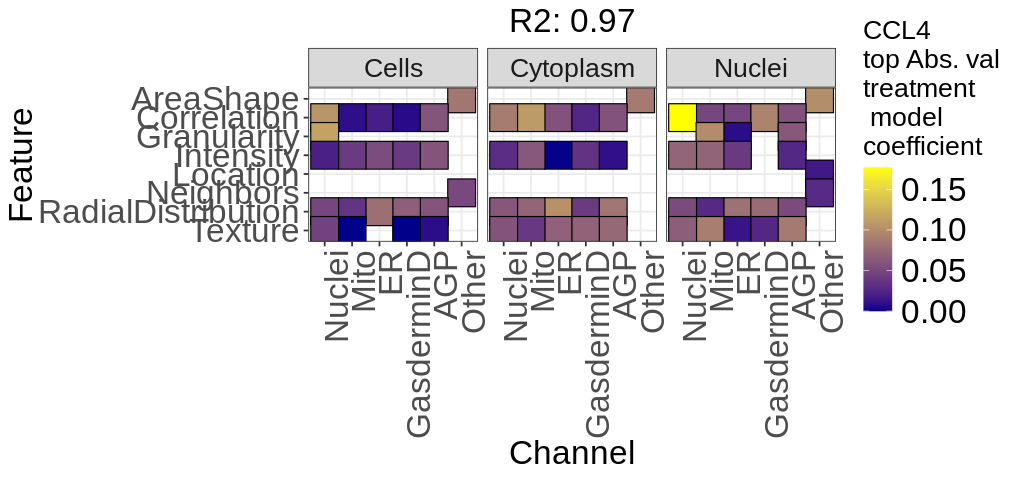

In [25]:
cytokine <- 'CCL4 [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]
CCL4_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)

CCL4_final <- process_subset_data(CCL4_final)
head(CCL4_final)
# factor levels
# rename the factor levels
CCL4_final$channel_learned <- factor(
    CCL4_final$channel_learned,
    levels = c(
        "nuclei",
        "Mito",
        "ER",
        "gasdermin",
        "PM",
        "other"
    ),
    labels = c(
        "Nuclei",
        "Mito",
        "ER",
        "GasderminD",
        "AGP",
        "Other"
    )
)
CCL4_final$feature_group <- factor(
    CCL4_final$feature_group,
    levels = c(
        "AreaShape",
        "Correlation",
        "Granularity",
        "Intensity",
        "Location",
        "Neighbors",
        "RadialDistribution",
        "Texture"
    )
)
# reverese the order of the factor levels
CCL4_final$feature_group <- factor(
    CCL4_final$feature_group,
    levels = rev(levels(CCL4_final$feature_group))
)

CCL4_final_plot <- plot_coeffs(CCL4_final, cytokine, shuffle)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 8.5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, CCL4_final_plot, width=width, height=height, dpi=500)
CCL4_final_plot


## Heatmap of Coefficients

In [26]:
# set cell type
cell_type <- "PBMC"


In [27]:
# set path for data of all models
data_path <- file.path(paste0("../../../6.bulk_Morphology_Elastic_Network/4.model_performance/results/regression/", cell_type, "/", "all_model_performance.csv"))
df <- read.csv(data_path)
# setfigure path
figure_path <- file.path(paste0("../figures/regression/", cell_type, "/"))
# make the directory if it doesn't exist
dir.create(figure_path, recursive = TRUE, showWarnings = FALSE)


In [28]:
# fix the col name
df <- df %>% 
  mutate(secreted_proteins = case_when(
    secreted_proteins == "MMP-1 [NSU]" ~ "MMP-1",
    secreted_proteins == "VEGFR-1 [NSU]" ~ "VEGFR-1",
    secreted_proteins == "CCL4 [NSU]" ~ "CCL4",
    secreted_proteins == "MMP-12 [NSU]" ~ "MMP-12",
    secreted_proteins == "CCL18 [NSU]" ~ "CCL18",
    secreted_proteins == "IL-9 [NSU]" ~ "IL-9",
    secreted_proteins == "TWEAK [NSU]" ~ "TWEAK",
    secreted_proteins == "EGFR [NSU]" ~ "EGFR",
    secreted_proteins == "IL-21 [NSU]" ~ "IL-21",
    secreted_proteins == "FGF-1 [NSU]" ~ "FGF-1",
    secreted_proteins == "FAS-L [NSU]" ~ "FAS-L",
    secreted_proteins == "CXCL12 (beta) [NSU]" ~ "CXCL12 (beta)",
    secreted_proteins == "CXCL12 (alpha) [NSU]" ~ "CXCL12 (alpha)",
    secreted_proteins == "CXCL14 [NSU]" ~ "CXCL14",
    secreted_proteins == "HGF [NSU]" ~ "HGF",
    secreted_proteins == "IL-3 [NSU]" ~ "IL-3",
    secreted_proteins == "CXCL7 [NSU]" ~ "CXCL7",
    secreted_proteins == "CCL25 [NSU]" ~ "CCL25",
    secreted_proteins == "BMP9 [NSU]" ~ "BMP9",
    secreted_proteins == "IL-12 p35 [NSU]" ~ "IL-12 p35",
    secreted_proteins == "CCL16 [NSU]" ~ "CCL16",
    secreted_proteins == "CCL2 [NSU]" ~ "CCL2",
    secreted_proteins == "LIF [NSU]" ~ "LIF",
    secreted_proteins == "CXCL9 [NSU]" ~ "CXCL9",
    secreted_proteins == "CNTF [NSU]" ~ "CNTF",
    secreted_proteins == "TSLP [NSU]" ~ "TSLP",
    secreted_proteins == "Flt-3 Ligand [NSU]" ~ "Flt-3 Ligand",
    secreted_proteins == "CD14 [NSU]" ~ "CD14",
    secreted_proteins == "IL-16 [NSU]" ~ "IL-16",
    secreted_proteins == "FGF-21 [NSU]" ~ "FGF-21",
    secreted_proteins == "IL-29 [NSU]" ~ "IL-29",
    secreted_proteins == "IL-17C [NSU]" ~ "IL-17C",
    secreted_proteins == "IFN-epsilon [NSU]" ~ "IFN-epsilon",
    secreted_proteins == "PCSK9 [NSU]" ~ "PCSK9",
    secreted_proteins == "TPO (Thrombopoietin) [NSU]" ~ "Thrombopoietin",
    secreted_proteins == "TREM2 [NSU]" ~ "TREM2",
    secreted_proteins == "Growth Hormone (Somatotropin) [NSU]" ~ "Somatotropin",
    secreted_proteins == "CCL1 [NSU]" ~ "CCL1",
    secreted_proteins == "LOX1 (OLR1) [NSU]" ~ "LOX1 (OLR1)",
    secreted_proteins == "MMP-3 [NSU]" ~ "MMP-3",
    secreted_proteins == "IL-32 (alpha) [NSU]" ~ "IL-32 (alpha)",
    secreted_proteins == "IL-7 [NSU]" ~ "IL-7",
    secreted_proteins == "CCL21 [NSU]" ~ "CCL21",
    secreted_proteins == "CD276 (B7-H3) [NSU]" ~ "CD276 (B7-H3)",
    secreted_proteins == "IL-2 RA [NSU]" ~ "IL-2 RA",
    secreted_proteins == "Calbindin [NSU]" ~ "Calbindin",
    secreted_proteins == "CCL3 [NSU]" ~ "CCL3",
    secreted_proteins == "ICAM-1 [NSU]" ~ "ICAM-1",
    secreted_proteins == "IL-17A [NSU]" ~ "IL-17A",
    secreted_proteins == "CCL28 [NSU]" ~ "CCL28",
    secreted_proteins == "TIMP1 [NSU]" ~ "TIMP1",
    secreted_proteins == "GDF-15 (MIC-1) [NSU]" ~ "GDF-15 (MIC-1)",
    secreted_proteins == "CXCL17 [NSU]" ~ "CXCL17",
    secreted_proteins == "M-CSF R (CD115) [NSU]" ~ "M-CSF R (CD115)",
    secreted_proteins == "CCL7 [NSU]" ~ "CCL7",
    secreted_proteins == "Granzyme B [NSU]" ~ "Granzyme B",
    secreted_proteins == "CXCL4 [NSU]" ~ "CXCL4",
    secreted_proteins == "PDGF-BB [NSU]" ~ "PDGF-BB",
    secreted_proteins == "CX3CL1 [NSU]" ~ "CX3CL1",
    secreted_proteins == "FGF-6 [NSU]" ~ "FGF-6",
    secreted_proteins == "IL-35 [NSU]" ~ "IL-35",
    secreted_proteins == "MMP-7 [NSU]" ~ "MMP-7",
    secreted_proteins == "GM-CSF [NSU]" ~ "GM-CSF",
    secreted_proteins == "CCL24 [NSU]" ~ "CCL24",
    secreted_proteins == "IL-12 p40 [NSU]" ~ "IL-12 p40",
    secreted_proteins == "IL-5 [NSU]" ~ "IL-5",
    secreted_proteins == "BCMA (TNFRSF17) [NSU]" ~ "BCMA (TNFRSF17)",
    secreted_proteins == "Tissue Factor (TF) [NSU]" ~ "Tissue Factor",
    secreted_proteins == "IL-1 beta [NSU]" ~ "IL-1 beta",
    secreted_proteins == "CD30 [NSU]" ~ "CD30",
    secreted_proteins == "CCL27 [NSU]" ~ "CCL27",
    secreted_proteins == "ICAM-2 [NSU]" ~ "ICAM-2",
    secreted_proteins == "CXCL16 [NSU]" ~ "CXCL16",
    secreted_proteins == "VEGF-A (165) [NSU]" ~ "VEGF-A (165)",
    secreted_proteins == "IL-2 [NSU]" ~ "IL-2",
    secreted_proteins == "HVEM [NSU]" ~ "HVEM",
    secreted_proteins == "PTX3 (Pentraxin 3) [NSU]" ~ "PTX3",
    secreted_proteins == "IL-1 alpha [NSU]" ~ "IL-1 alpha",
    secreted_proteins == "CXCL3 [NSU]" ~ "CXCL3",
    secreted_proteins == "Oncostatin M (OSM) [NSU]" ~ "Oncostatin M",
    secreted_proteins == "CCL8 [NSU]" ~ "CCL8",
    secreted_proteins == "CCL15 [NSU]" ~ "CCL15",
    secreted_proteins == "FLRG (FSTL3) [NSU]" ~ "FLRG",
    secreted_proteins == "CXCL5 [NSU]" ~ "CXCL5",
    secreted_proteins == "CD163 [NSU]" ~ "CD163",
    secreted_proteins == "IL-17E (IL-25) [NSU]" ~ "IL-17E",
    secreted_proteins == "NF-L [NSU]" ~ "NF-L",
    secreted_proteins == "IFN alpha 2 (alpha 2b) [NSU]" ~ "IFN alpha 2",
    secreted_proteins == "TNF RI [NSU]" ~ "TNF RI",
    secreted_proteins == "CD40L [NSU]" ~ "CD40L",
    secreted_proteins == "IFN beta [NSU]" ~ "IFN beta",
    secreted_proteins == "VEGF Receptor 2 (Flk-1) [NSU]" ~ "VEGF Receptor 2",
    secreted_proteins == "BDNF [NSU]" ~ "BDNF",
    secreted_proteins == "Amyloid beta [NSU]" ~ "Amyloid beta",
    secreted_proteins == "MMP-2 [NSU]" ~ "MMP-2",
    secreted_proteins == "SAA [NSU]" ~ "SAA",
    secreted_proteins == "uPA [NSU]" ~ "uPA",
    secreted_proteins == "IL-22 BP [NSU]" ~ "IL-22 BP",
    secreted_proteins == "TRAIL [NSU]" ~ "TRAIL",
    secreted_proteins == "Mesothelin [NSU]" ~ "Mesothelin",
    secreted_proteins == "Activin A [NSU]" ~ "Activin A",
    secreted_proteins == "MMP-9 [NSU]" ~ "MMP-9",
    secreted_proteins == "CCL13 [NSU]" ~ "CCL13",
    secreted_proteins == "CXCL11 [NSU]" ~ "CXCL11",
    secreted_proteins == "IL-31 [NSU]" ~ "IL-31",
    secreted_proteins == "MIF [NSU]" ~ "MIF",
    secreted_proteins == "BMP7 [NSU]" ~ "BMP7",
    secreted_proteins == "IL-12 p70 [NSU]" ~ "IL-12 p70",
    secreted_proteins == "CCL19 [NSU]" ~ "CCL19",
    secreted_proteins == "CCL5 [NSU]" ~ "CCL5",
    secreted_proteins == "IL-33 [NSU]" ~ "IL-33",
    secreted_proteins == "IL-22 [NSU]" ~ "IL-22",
    secreted_proteins == "CCL11 [NSU]" ~ "CCL11",
    secreted_proteins == "IL-8 [NSU]" ~ "IL-8",
    secreted_proteins == "SCF [NSU]" ~ "SCF",
    secreted_proteins == "TNF RII [NSU]" ~ "TNF RII",
    secreted_proteins == "FGF-2 [NSU]" ~ "FGF-2",
    secreted_proteins == "Leptin [NSU]" ~ "Leptin",
    secreted_proteins == "CXCL13 [NSU]" ~ "CXCL13",
    secreted_proteins == "TNF alpha [NSU]" ~ "TNF alpha",
    secreted_proteins == "IL-4 [NSU]" ~ "IL-4",
    secreted_proteins == "CCL23 [NSU]" ~ "CCL23",
    secreted_proteins == "IGF-1 [NSU]" ~ "IGF-1",
    secreted_proteins == "FGF-4 [NSU]" ~ "FGF-4",
    secreted_proteins == "GDF-11 (BMP-11) [NSU]" ~ "GDF-11 (BMP-11)",
    secreted_proteins == "IL-10 [NSU]" ~ "IL-10",
    secreted_proteins == "IL-23 [NSU]" ~ "IL-23",
    secreted_proteins == "TNF RIII (Lymphotoxin Beta R) [NSU]" ~ "TNF RIII",
    secreted_proteins == "IL-17B [NSU]" ~ "IL-17B",
    secreted_proteins == "ST2 (IL-33R) [NSU]" ~ "ST2 (IL-33R)",
    secreted_proteins == "PLGF [NSU]" ~ "PLGF",
    secreted_proteins == "VEGF-D [NSU]" ~ "VEGF-D",
    secreted_proteins == "XCL1 (Lymphotactin) [NSU]" ~ "XCL1",
    secreted_proteins == "GDNF [NSU]" ~ "GDNF",
    secreted_proteins == "C5 [NSU]" ~ "C5",
    secreted_proteins == "IL-1 RA" ~ "IL-1 RA",
    secreted_proteins == "IL-17D [NSU]" ~ "IL-17D",
    secreted_proteins == "IL-27 [NSU]" ~ "IL-27",
    secreted_proteins == "Osteopontin (OPN) [NSU]" ~ "Osteopontin",
    secreted_proteins == "FGF-9 [NSU]" ~ "FGF-9",
    secreted_proteins == "BAFF [NSU]" ~ "BAFF",
    secreted_proteins == "TGF-beta 3 [NSU]" ~ "TGF-beta 3",
    secreted_proteins == "EGF [NSU]" ~ "EGF",
    secreted_proteins == "IL-5 [NSU]" ~ "IL-5",
    secreted_proteins == "FGF-7 (KGF) [NSU]" ~ "FGF-7 (KGF)",
    secreted_proteins == "APRIL [NSU]" ~ "APRIL",
    secreted_proteins == "WISP-1 (CCN4) [NSU]" ~ "WISP-1 (CCN4)",
    secreted_proteins == "CCL22 [NSU]" ~ "CCL22",
    secreted_proteins == "FGF-19 [NSU]" ~ "FGF-19",
    secreted_proteins == "M-CSF [NSU]" ~ "M-CSF",
    secreted_proteins == "CXCL10 [NSU]" ~ "CXCL10",
    secreted_proteins == "TGF-beta 1 (total) [NSU]" ~ "TGF-beta 1 ",
    secreted_proteins == "Tie-2 [NSU]" ~ "Tie-2",
    secreted_proteins == "TGF-beta 1 (LAP domain in precursor) [NSU]" ~ "TGF-beta 1",
    secreted_proteins == "FGFR3 (IIIc) [NSU]" ~ "FGFR3 (IIIc)",
    secreted_proteins == "AITRL (GITR Ligand) [NSU]" ~ "AITRL (GITR Ligand)",
    secreted_proteins == "Amphiregulin [NSU]" ~ "Amphiregulin",
    secreted_proteins == "BMP4 [NSU]" ~ "BMP4",
    secreted_proteins == "G-CSF [NSU]" ~ "G-CSF",
    secreted_proteins == "TGF-beta 2 [NSU]" ~ "TGF-beta 2",
    secreted_proteins == "IL-6 R alpha [NSU]" ~ "IL-6 R alpha",
    secreted_proteins == "BMP6 [NSU]" ~ "BMP6",
    secreted_proteins == "NGF beta [NSU]" ~ "NGF beta",
    secreted_proteins == "IL-1 R1 [NSU]" ~ "IL-1 R1",
    secreted_proteins == "MMP-10 [NSU]" ~ "MMP-10",
    secreted_proteins == "IL-17F [NSU]" ~ "IL-17F",
    secreted_proteins == "IL-18 [NSU]" ~ "IL-18",
    secreted_proteins == "CXCL6 [NSU]" ~ "CXCL6",
    secreted_proteins == "IL-6 [NSU]" ~ "IL-6",
    secreted_proteins == "CXCL1 [NSU]" ~ "CXCL1",
    secreted_proteins == "VEGF-C [NSU]" ~ "VEGF-C",
    secreted_proteins == "Resistin [NSU]" ~ "Resistin",
    secreted_proteins == "EMMPRIN [NSU]" ~ "EMMPRIN",
    secreted_proteins == "IFN gamma [NSU]" ~ "IFN gamma",
    secreted_proteins == "CCL20 [NSU]" ~ "CCL20",
    secreted_proteins == "CRP [NSU]" ~ "CRP",
    secreted_proteins == "VCAM-1 [NSU]" ~ "VCAM-1",
    secreted_proteins == "Cytochrome C [NSU]" ~ "Cytochrome C",
    secreted_proteins == "BMP3 [NSU]" ~ "BMP3",
    secreted_proteins == "IL-24 [NSU]" ~ "IL-24",
    secreted_proteins == "IL-28A [NSU]" ~ "IL-28A",
    secreted_proteins == "CCL17 [NSU]" ~ "CCL17",
    secreted_proteins == "BMP2 [NSU]" ~ "BMP2",
    secreted_proteins == "CD27L [NSU]" ~ "CD27L",
    secreted_proteins == "NRG1 beta 1 [NSU]" ~ "NRG1 beta 1",
    secreted_proteins == "IL-11 [NSU]" ~ "IL-11",
    TRUE ~ secreted_proteins
  ))


In [29]:
# select MMP-1 secreted protein as the target
df <- df %>% filter(shuffle == "final")


In [30]:
# get all secreted_proteins and the corresponding r2 value
tmp_df <- df %>% select(secreted_proteins, r2)
# remove duplicates
tmp_df <- tmp_df[!duplicated(tmp_df),]
# sort by r2 value
tmp_df <- tmp_df[order(tmp_df$r2),]
head(tmp_df)
# set order of secreted_proteins (columns)
column_order <- tmp_df$secreted_proteins

secreted_proteins   r2        
170259 FGF-21              -0.3319743
163065 IL-17C              -0.3061109
45563  CX3CL1              -0.2933235
35971  IL-11               -0.2667794
71941  AITRL (GITR Ligand) -0.2305269
19185  NGF beta            -0.1871606

In [31]:
# get the feature names for color bar visualization 
features <- df %>% select(feature_names)
# drop duplicate features from the feature names
features <- unique(features)
features <- features %>%
        tidyr::separate(
            feature_names,
            into = c(
                "compartment",
                "feature_group",
                "measurement",
                "channel", 
                "parameter1", 
                "parameter2"
            ),
            sep = "_",
            remove = FALSE
        ) %>%
        dplyr::mutate(channel_cleaned = channel)

    # Clean channel for visualization
    features$channel_learned <- dplyr::recode(features$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "GasderminD",
            "CorrPM" = "AGP",
            .default = "Other",
            .missing="Other"
    )
# make the channel learned a factor
features$channel_learned <- factor(features$channel_learned, levels = c("Nuclei", "Mito", "ER", "Gasdermin", "AGP", "Other"))


Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [13, 14, 15, 18, 19,
21, 25, 43, 44, 45, 67, 68, 380, 381, 382, 383, 384, 385, 386, 387, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 4, 5, 6,
7, 8, 9, 11, 12, 16, 17, 20, 22, 23, 24, 26, 27, 28, 29, ...].”


In [32]:
legend_title_size <- 28
legend_text_size <- 24

In [33]:
r2_df <- tmp_df 
head(r2_df)
# alphabetically reorder the df by secreted_proteins

r2_df <- r2_df[order(r2_df$secreted_proteins),]
rownames(r2_df) <- NULL
head(r2_df)

secreted_proteins   r2        
170259 FGF-21              -0.3319743
163065 IL-17C              -0.3061109
45563  CX3CL1              -0.2933235
35971  IL-11               -0.2667794
71941  AITRL (GITR Ligand) -0.2305269
19185  NGF beta            -0.1871606

secreted_proteins   r2        
1 Activin A            0.8640594
2 AITRL (GITR Ligand) -0.2305269
3 Amphiregulin         0.9125092
4 Amyloid beta         0.2505001
5 APRIL               -0.1663366
6 BAFF                 0.2049370

In [34]:
column_ha <- HeatmapAnnotation(
    R2 = r2_df$r2,
    show_legend = TRUE,
    annotation_name_side = "left",
    # rotate the title
    annotation_legend_param = list(
        labels_gp = gpar(fontsize = legend_text_size, angle = 0),
        title_position = "topcenter",
        title_gp = gpar(fontsize = legend_title_size, hjust = 0.5, fontface = "bold")
    ),
    annotation_name_gp = gpar(fontsize = 20),
    # set color bar for r2 continuous value with brewer palette
    col = list(R2 = colorRamp2(c(0, 0.5, 1), 
    spectral_palette <- c(
        # white
        "#FFFFFF",
        # light blue
        "#A6CEE3",
        # dark blue
        "#1F78B4"
    )))

)                   


In [35]:
# make the df into a matrix for heatmap
mat <- dcast(df, feature_names ~ secreted_proteins, value.var = "coefficients")


In [36]:
row.names(mat) <- mat$feature_names
mat <- mat %>% select(-feature_names)
mat <- as.matrix(mat)
# na to 0
mat[is.na(mat)] <- 0

In [37]:
head(mat)

Activin A   AITRL (GITR Ligand) Amphiregulin
Cells_AreaShape_Compactness   0.21478002 0                    0.16630162 
Cells_AreaShape_Eccentricity  0.05596597 0                    0.00000000 
Cells_AreaShape_FormFactor   -0.12880135 0                   -0.04836273 
Cells_AreaShape_MeanRadius    0.00000000 0                    0.00000000 
Cells_AreaShape_Orientation   0.00000000 0                    0.00000000 
Cells_AreaShape_Zernike_0_0  -0.08782786 0                    0.00000000 
                             Amyloid beta APRIL       BAFF BCMA (TNFRSF17) BDNF
Cells_AreaShape_Compactness  -0.005450813 -0.04865980 0    0               0   
Cells_AreaShape_Eccentricity  0.000000000  0.00000000 0    0               0   
Cells_AreaShape_FormFactor    0.000000000  0.01648436 0    0               0   
Cells_AreaShape_MeanRadius    0.000000000  0.00000000 0    0               0   
Cells_AreaShape_Orientation   0.000000000  0.00000000 0    0               0   
Cells_AreaShape_Zernike_0_0   0.000000000  0.01147324 0    0               0   
                             BMP2 BMP3          ⋯ TWEAK uPA VCAM-1
Cells_AreaShape_Compactness  0    -0.0125988753 ⋯ 0     0   0     
Cells_AreaShape_Eccentricity 0    -0.0044827956 ⋯ 0     0   0     
Cells_AreaShape_FormFactor   0     0.0078078518 ⋯ 0     0   0     
Cells_AreaShape_MeanRadius   0     0.0007353072 ⋯ 0     0   0     
Cells_AreaShape_Orientation  0     0.0000000000 ⋯ 0     0   0     
Cells_AreaShape_Zernike_0_0  0     0.0069115714 ⋯ 0     0   0     
                             VEGF Receptor 2 VEGF-A (165) VEGF-C VEGF-D
Cells_AreaShape_Compactness  0               -0.04922425  0      0     
Cells_AreaShape_Eccentricity 0               -0.01253124  0      0     
Cells_AreaShape_FormFactor   0                0.03027420  0      0     
Cells_AreaShape_MeanRadius   0                0.00000000  0      0     
Cells_AreaShape_Orientation  0               -0.01107793  0      0     
Cells_AreaShape_Zernike_0_0  0                0.01984057  0      0     
                             VEGFR-1      WISP-1 (CCN4) XCL1
Cells_AreaShape_Compactness   0.052062399 0             0   
Cells_AreaShape_Eccentricity  0.023948198 0             0   
Cells_AreaShape_FormFactor   -0.035983025 0             0   
Cells_AreaShape_MeanRadius   -0.008983062 0             0   
Cells_AreaShape_Orientation   0.000000000 0             0   
Cells_AreaShape_Zernike_0_0  -0.032064727 0             0

In [38]:
legend_height <- unit(4, "cm")
legend_width <- unit(10, "cm")
mat <- as.data.frame(mat)
# mat <- as.matrix(mat)
# get the feature names from the index
mat$feature_names <- row.names(mat)
# get the feature names for color bar visualization
# drop duplicate features from the feature names
features <- unique(features)
features <- features %>%
        tidyr::separate(
            feature_names,
            into = c(
                "compartment",
                "feature_group",
                "measurement",
                "channel", 
                "parameter1", 
                "parameter2"
            ),
            sep = "_",
            remove = FALSE
        ) %>%
        dplyr::mutate(channel_cleaned = channel)

    # Clean channel for visualization
    features$channel_learned <- dplyr::recode(features$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "GasderminD",
            "CorrPM" = "AGP",
            .default = "Other",
            .missing="Other"
    )

# set annotations
row_ha_1 <- rowAnnotation(
    Object = features$compartment,
    show_legend = TRUE,
    # change the legend titles
    annotation_legend_param = list(
        title_position = "topcenter", 
        title_gp = gpar(fontsize = legend_title_size, hjust = 0.5,fontface = "bold"),
        labels_gp = gpar(fontsize = legend_text_size),
        legend_width = unit(legend_width, "cm"),
        legend_height = unit(legend_height, "cm"),
        direction = "horizontal"
                
        ),
    annotation_name_side = "bottom",
    annotation_name_gp = gpar(fontsize = 20),
    # color
    col = list(
        Object = c(
            "Cells" = brewer.pal(12, "Accent")[7], 
            "Cytoplasm" = brewer.pal(12, "Accent")[6], 
            "Nuclei" = "#0000AB"
        )
    )
)

row_ha_2 <- rowAnnotation(
        FeatureType = features$feature_group, 
       annotation_legend_param = list(
        title_position = "topcenter", 
        title_gp = gpar(fontsize = legend_title_size, hjust = 0.5,fontface = "bold"),
        labels_gp = gpar(fontsize = legend_text_size),
        legend_width = unit(legend_width, "cm"),
        legend_height = unit(legend_height, "cm"),
        direction = "horizontal"
        ),
    annotation_name_side = "bottom",
    annotation_name_gp = gpar(fontsize = 20),
    col = list(
            FeatureType = c(
            "AreaShape" = brewer.pal(8, "Dark2")[1],
            "Correlation" = brewer.pal(8, "Dark2")[2],
            "Granularity" = brewer.pal(8, "Dark2")[3],
            "Intensity" = brewer.pal(8, "Dark2")[4],
            "Location" = brewer.pal(8, "Dark2")[5],
            "Neighbors" =  brewer.pal(8, "Dark2")[6],
            "RadialDistribution" = brewer.pal(8, "Dark2")[7],
            "Texture" = brewer.pal(8, "Dark2")[8]
        
    )
)
)

row_ha_3 <- rowAnnotation(
    Channel = features$channel_learned, 
    annotation_legend_param = list(
        title_position = "topcenter", 
        title_gp = gpar(fontsize = legend_title_size, hjust = 0.5,fontface = "bold"),
        labels_gp = gpar(fontsize = legend_text_size),
        # make annotation bar text bigger
        legend = gpar(fontsize = legend_text_size),
        annotation_name = gpar(fontsize = 16),
        # make legend taller
        legend_width = unit(legend_width, "cm"),
        legend_height = unit(legend_height, "cm"),
        legend_key = gpar(fontsize = legend_text_size),
        direction = "horizontal"

        
            ),

    annotation_name_side = "bottom",
    # make font size bigger
    annotation_name_gp = gpar(fontsize = 20),
    col = list(
    Channel = c(
            "Nuclei" = "#0000AB",
            "Mito" = "#B000B0",
            "ER" = "#00D55B",
            "GasderminD" = "#FFFF00",
            "AGP" = "#C90000",
            "Other" = "#B09FB0")
    )
)

head(mat)
# # drop the feature names column
mat <- mat %>% select(-feature_names)
mat <- as.matrix(mat)

Warning message:
“Expected 6 pieces. Additional pieces discarded in 228 rows [13, 14, 15, 18, 19,
21, 25, 43, 44, 45, 67, 68, 380, 381, 382, 383, 384, 385, 386, 387, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 323 rows [1, 2, 4, 5, 6,
7, 8, 9, 11, 12, 16, 17, 20, 22, 23, 24, 26, 27, 28, 29, ...].”
Warning message in brewer.pal(12, "Accent"):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Warning message in brewer.pal(12, "Accent"):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”


Activin A   AITRL (GITR Ligand) Amphiregulin
Cells_AreaShape_Compactness   0.21478002 0                    0.16630162 
Cells_AreaShape_Eccentricity  0.05596597 0                    0.00000000 
Cells_AreaShape_FormFactor   -0.12880135 0                   -0.04836273 
Cells_AreaShape_MeanRadius    0.00000000 0                    0.00000000 
Cells_AreaShape_Orientation   0.00000000 0                    0.00000000 
Cells_AreaShape_Zernike_0_0  -0.08782786 0                    0.00000000 
                             Amyloid beta APRIL       BAFF BCMA (TNFRSF17) BDNF
Cells_AreaShape_Compactness  -0.005450813 -0.04865980 0    0               0   
Cells_AreaShape_Eccentricity  0.000000000  0.00000000 0    0               0   
Cells_AreaShape_FormFactor    0.000000000  0.01648436 0    0               0   
Cells_AreaShape_MeanRadius    0.000000000  0.00000000 0    0               0   
Cells_AreaShape_Orientation   0.000000000  0.00000000 0    0               0   
Cells_AreaShape_Zernike_0_0   0.000000000  0.01147324 0    0               0   
                             BMP2 BMP3          ⋯ uPA VCAM-1 VEGF Receptor 2
Cells_AreaShape_Compactness  0    -0.0125988753 ⋯ 0   0      0              
Cells_AreaShape_Eccentricity 0    -0.0044827956 ⋯ 0   0      0              
Cells_AreaShape_FormFactor   0     0.0078078518 ⋯ 0   0      0              
Cells_AreaShape_MeanRadius   0     0.0007353072 ⋯ 0   0      0              
Cells_AreaShape_Orientation  0     0.0000000000 ⋯ 0   0      0              
Cells_AreaShape_Zernike_0_0  0     0.0069115714 ⋯ 0   0      0              
                             VEGF-A (165) VEGF-C VEGF-D VEGFR-1     
Cells_AreaShape_Compactness  -0.04922425  0      0       0.052062399
Cells_AreaShape_Eccentricity -0.01253124  0      0       0.023948198
Cells_AreaShape_FormFactor    0.03027420  0      0      -0.035983025
Cells_AreaShape_MeanRadius    0.00000000  0      0      -0.008983062
Cells_AreaShape_Orientation  -0.01107793  0      0       0.000000000
Cells_AreaShape_Zernike_0_0   0.01984057  0      0      -0.032064727
                             WISP-1 (CCN4) XCL1 feature_names               
Cells_AreaShape_Compactness  0             0    Cells_AreaShape_Compactness 
Cells_AreaShape_Eccentricity 0             0    Cells_AreaShape_Eccentricity
Cells_AreaShape_FormFactor   0             0    Cells_AreaShape_FormFactor  
Cells_AreaShape_MeanRadius   0             0    Cells_AreaShape_MeanRadius  
Cells_AreaShape_Orientation  0             0    Cells_AreaShape_Orientation 
Cells_AreaShape_Zernike_0_0  0             0    Cells_AreaShape_Zernike_0_0

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



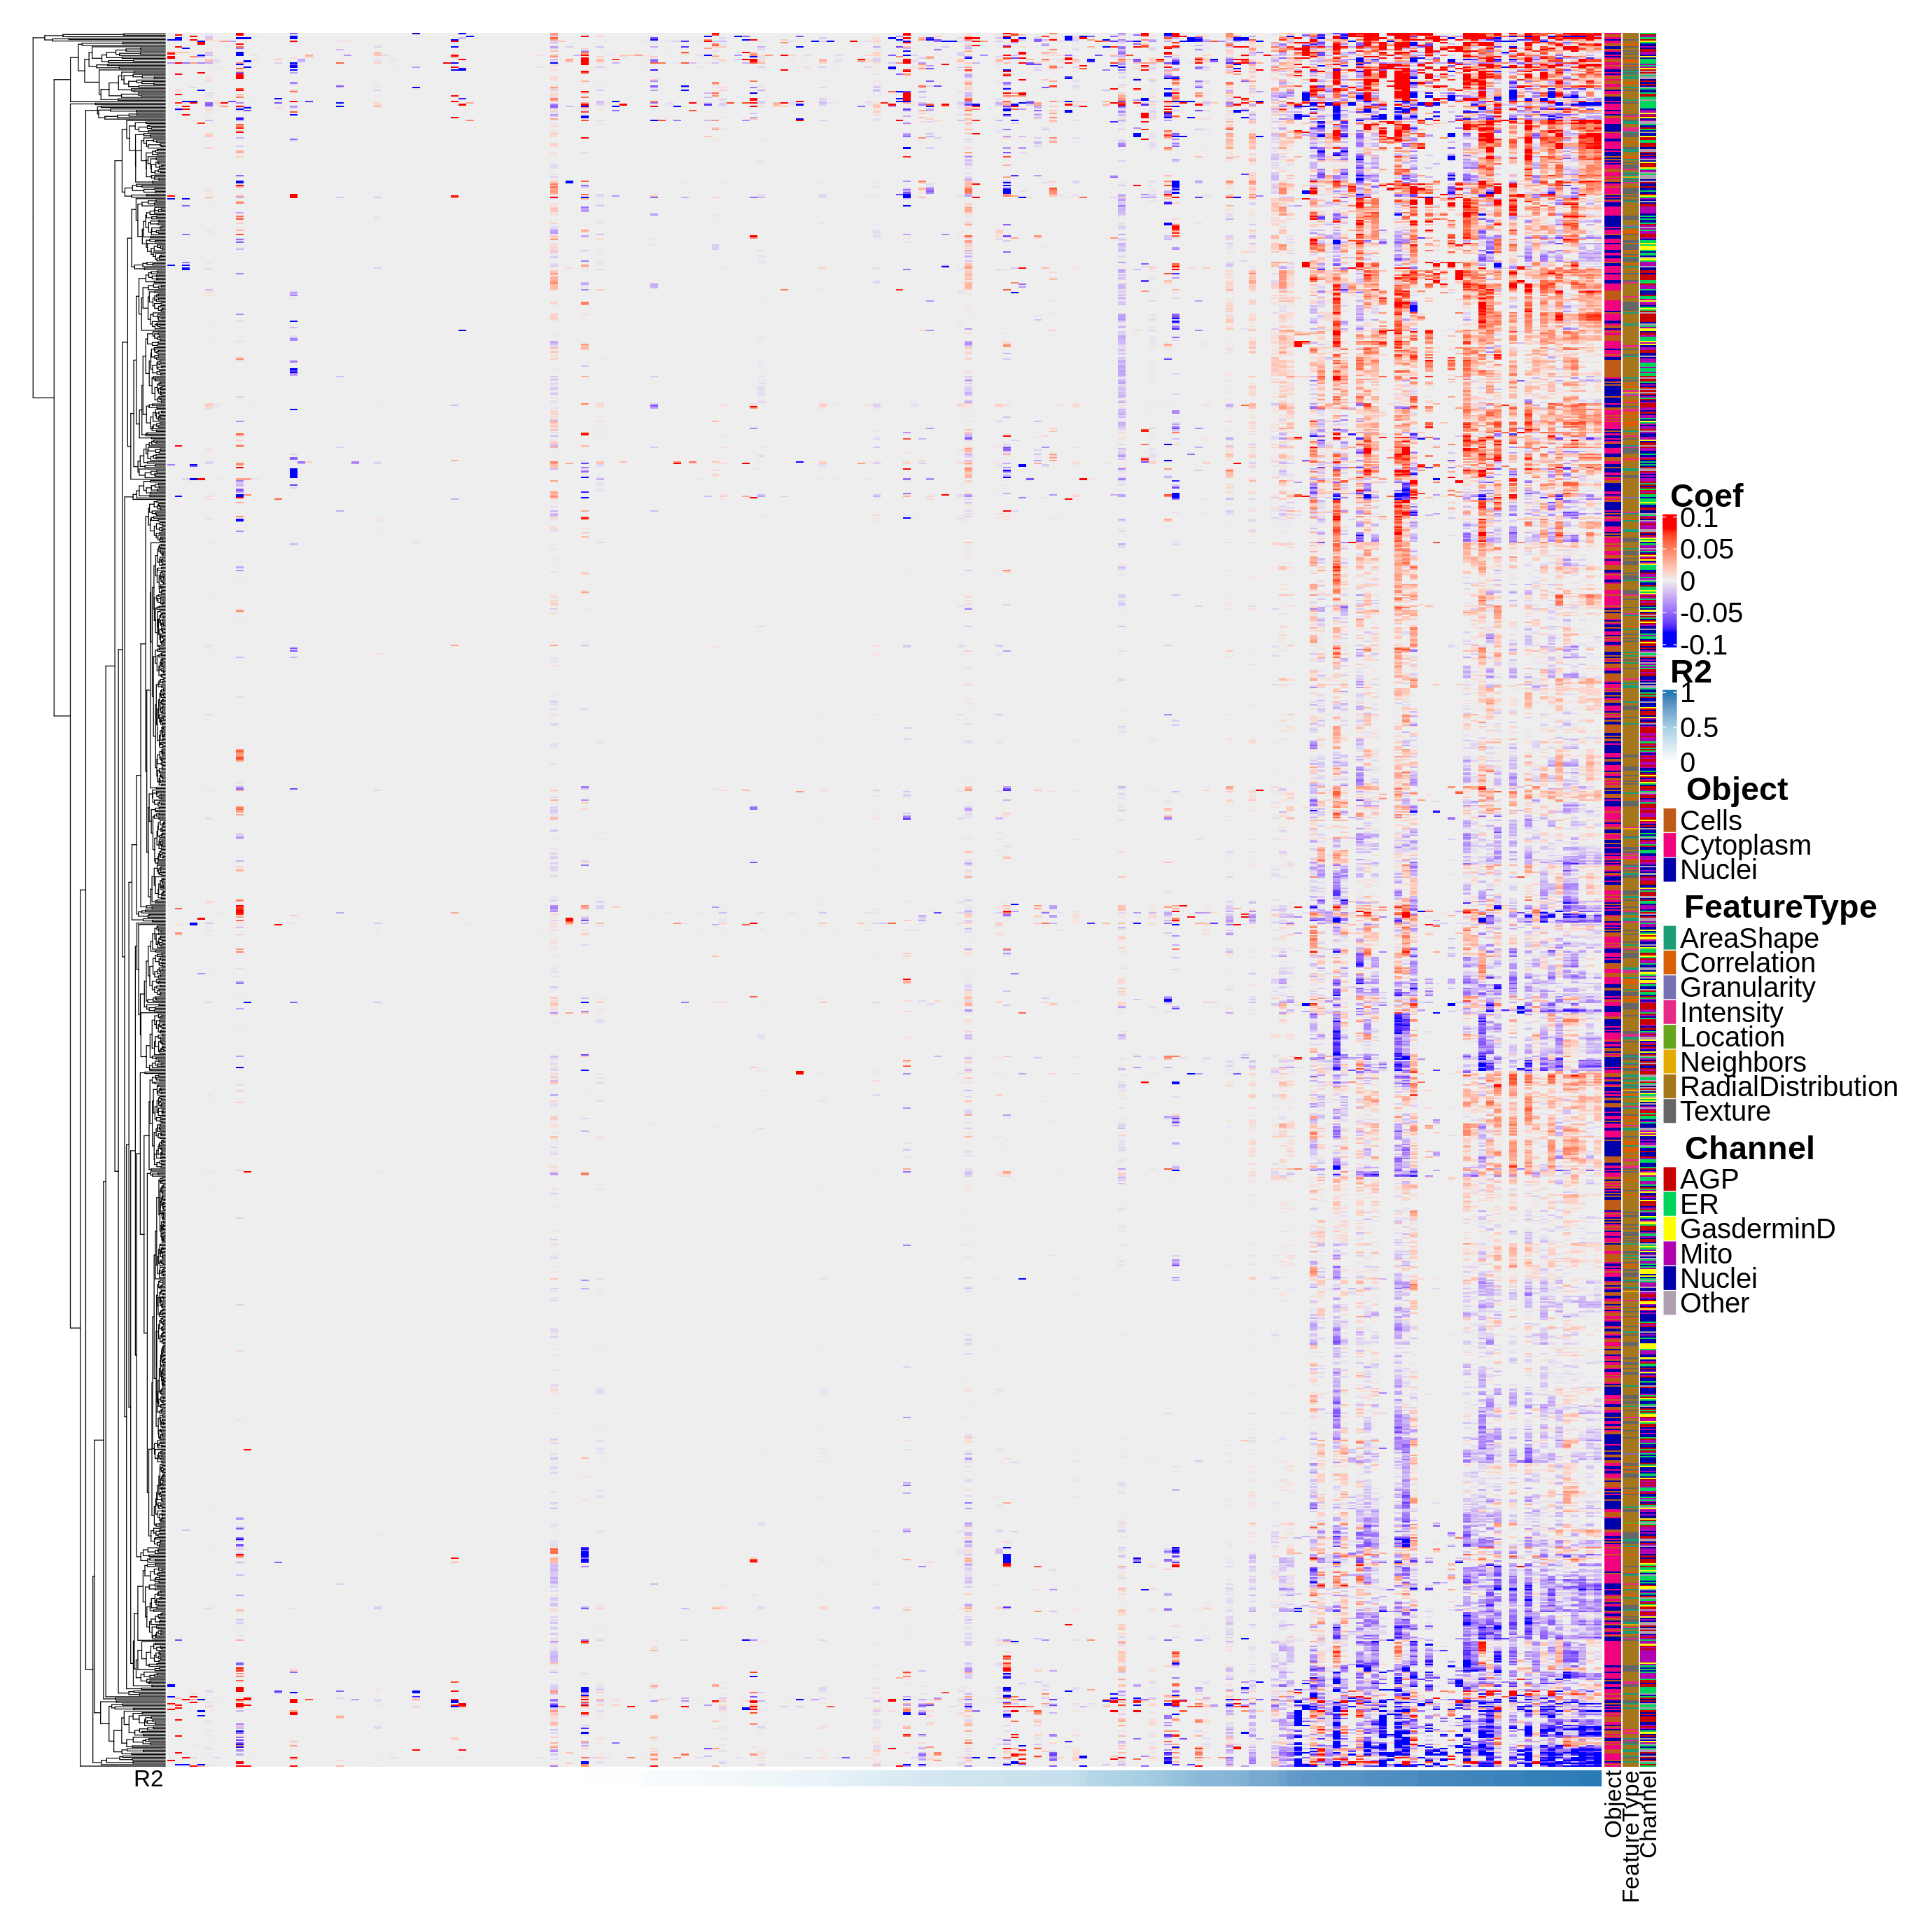

In [39]:
# plot size
width <- 23
height <- 23

options(repr.plot.width=width, repr.plot.height=height)
# change margins
# par(mar = c(1, 1, 1, 1))

model_heatmap <- (
        Heatmap(
        (mat), 
        cluster_rows = TRUE,    # Cluster rows
        cluster_columns = FALSE, # Cluster columns
        # order columns
        
        column_order = column_order,
        show_row_names = FALSE,  # Show row names
        show_column_names = FALSE, # Show column names
        column_names_gp = gpar(fontsize = 16), # Column name label formatting
        row_names_gp = gpar(fontsize = 14),    # Row name label formatting
        right_annotation = c(row_ha_1,row_ha_2,row_ha_3),
        bottom_annotation = column_ha,
        
        # rename fill legend
        heatmap_legend_param = list(
                title = "Coef", 
                title_position = "topcenter", 
                title_gp = gpar(fontsize = legend_title_size, hjust = 0.5,fontface = "bold"),
                labels_gp = gpar(fontsize = legend_text_size),
                legend_height = unit(legend_height, "cm"),
                legend_width = unit(legend_width, "cm")
                ),
        column_dend_height = unit(4, "cm"), 
        row_dend_width = unit(4, "cm"),
        

        )     
)
model_heatmap <- draw(

    model_heatmap,
    merge_legend = TRUE,
    padding = unit(c(1, 1, 1, 1), "cm")
)

In [ ]:
# save the plot
png(filename = paste0(figure_path, "S10.png"), width = width, height = height, units = "in", res = 600)
model_heatmap
dev.off()

png 
  2

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 110 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


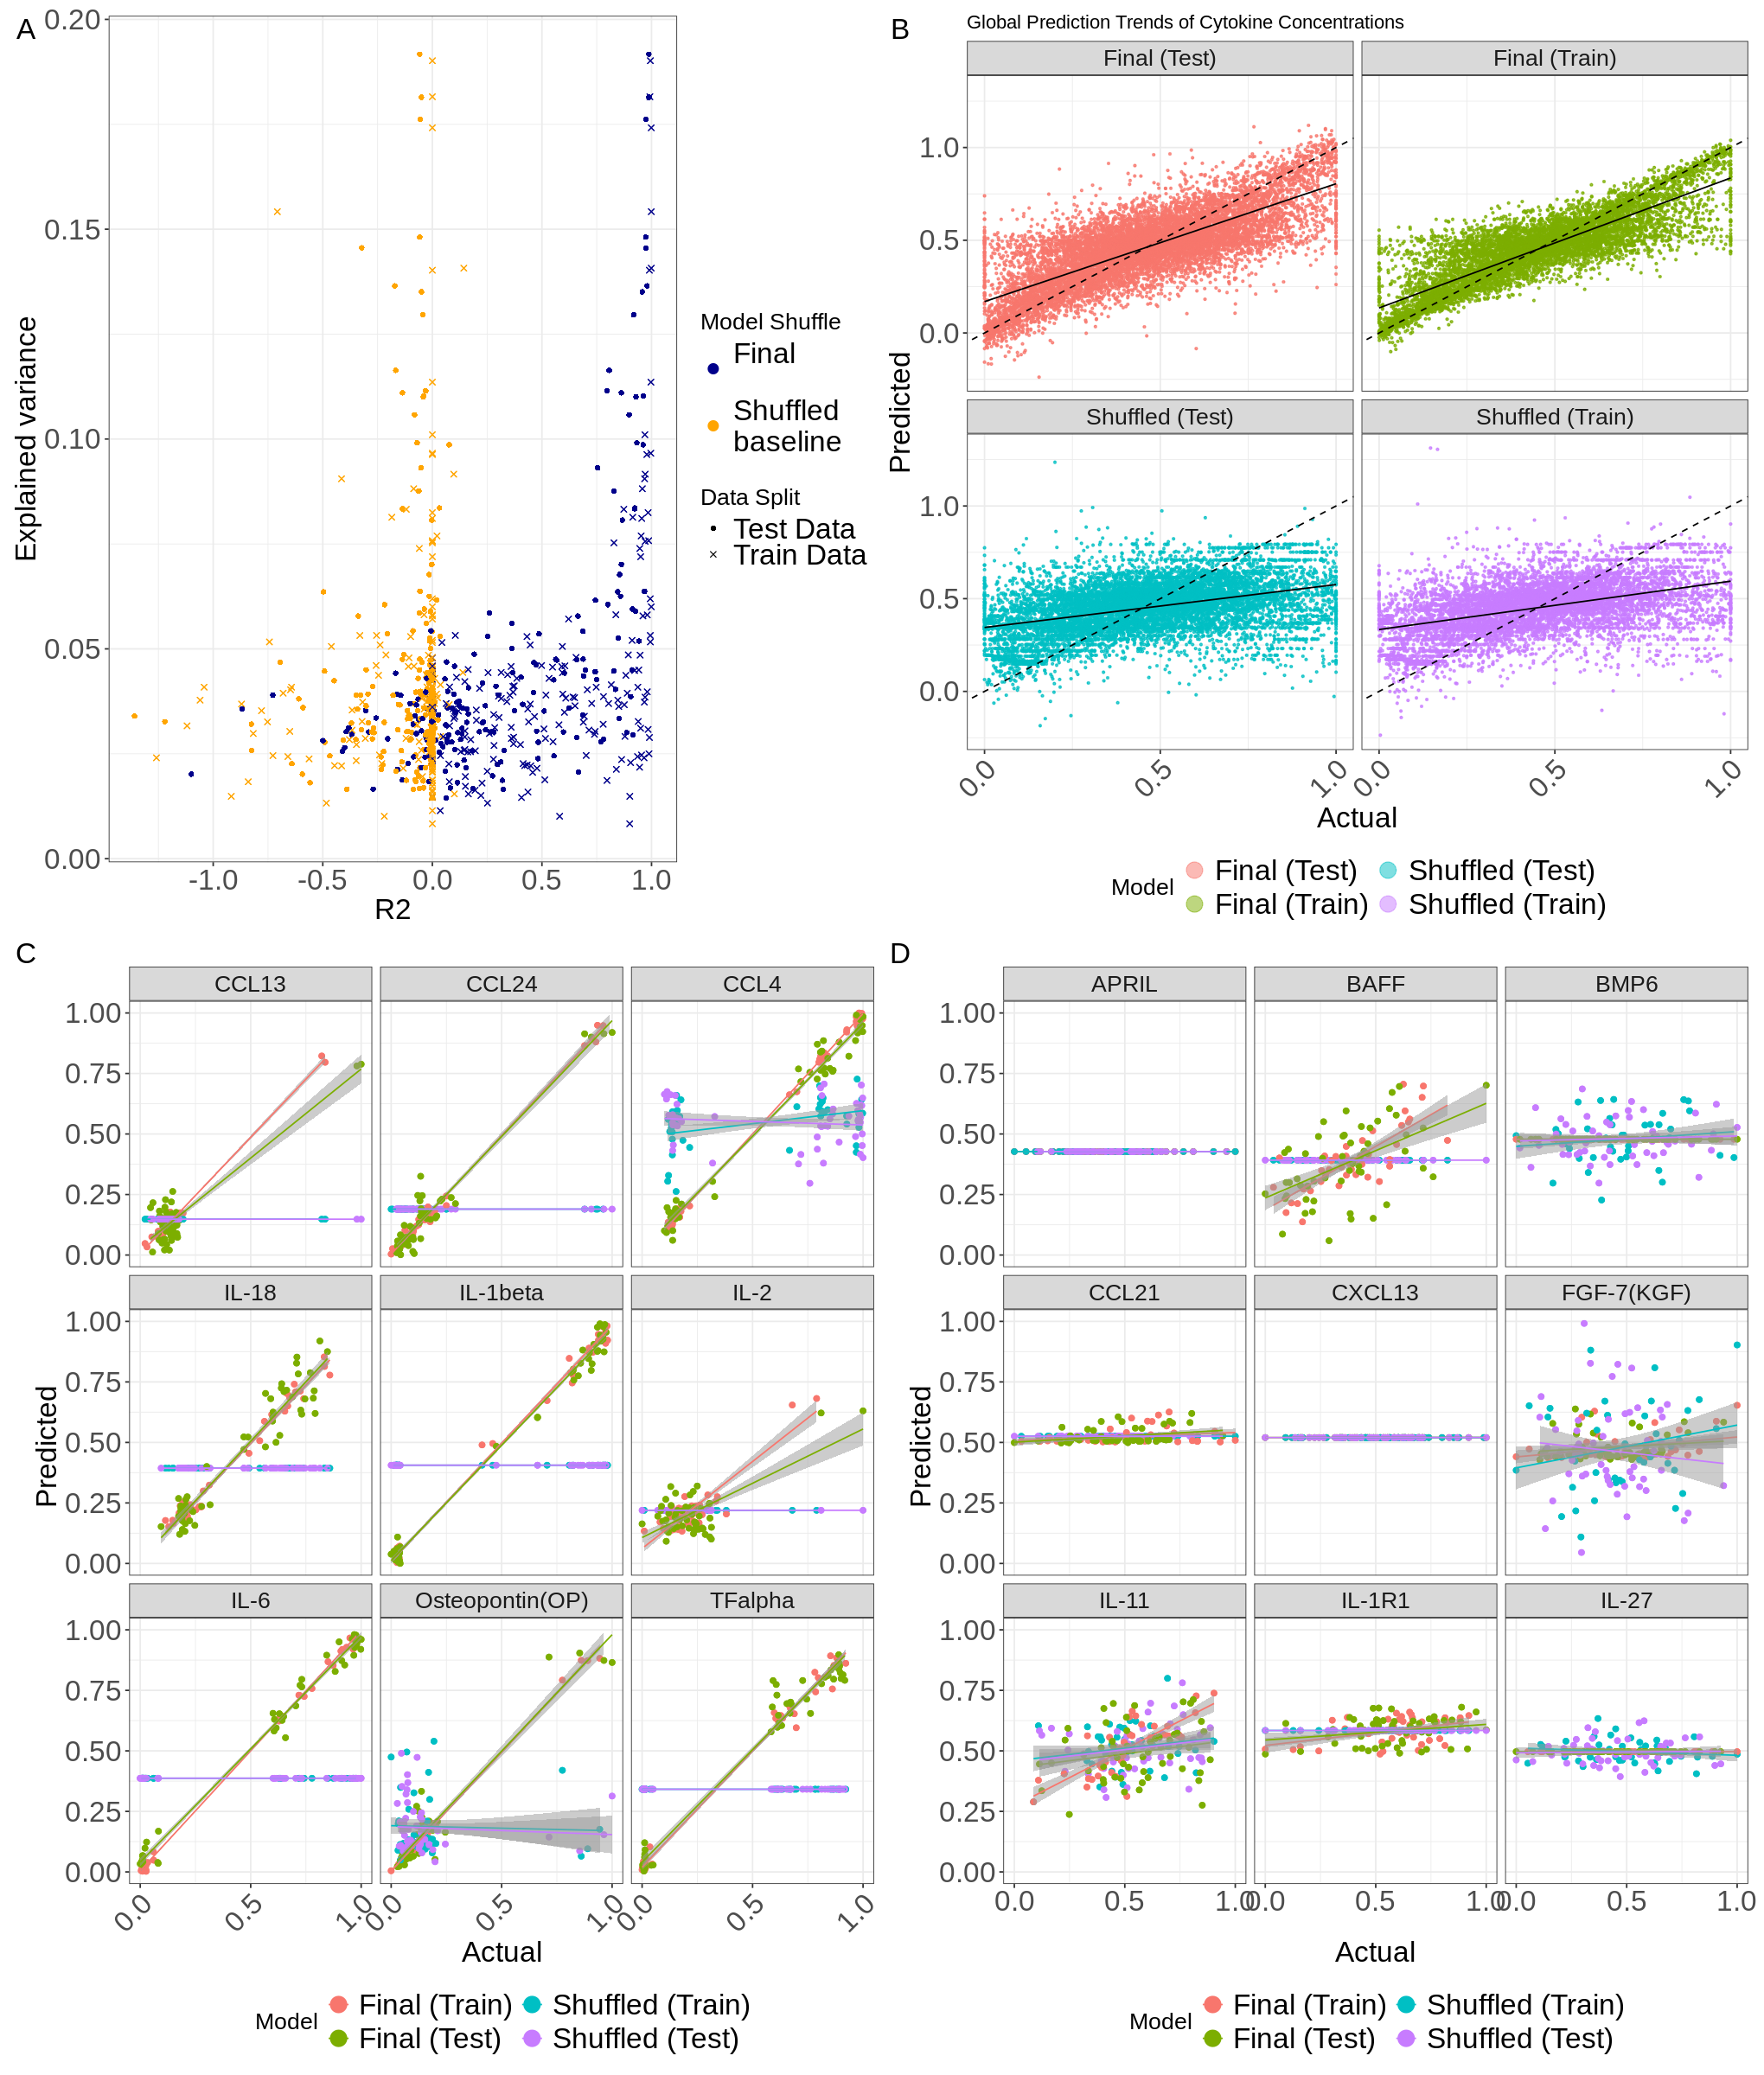

In [41]:
width <- 17
height <- 20
options(repr.plot.width=width, repr.plot.height=height)

design2 <- "
            AAACCC
            DDDEEE
            "

pt2 <- (
    wrap_elements(full = variance_r2_plot_global)
    + wrap_elements(full = global_prediction_trend_scatter)
    + cytokine_predictions1
    + cytokine_predictions2
    + plot_layout(design = design2)
    + plot_annotation(tag_levels = "A")  & theme(plot.tag = element_text(size = 20))
    
)
pt2

In [42]:
# functions to remove x or y axis labels
remove_x <- function(plot){
    plot <- plot + theme(axis.title.x = element_blank(),  # Remove x-axis label
        axis.text.x = element_blank())   # Remove x-axis text
    return(plot)
}

# remove y axis labels
remove_y <- function(plot){
    plot <- plot + theme(axis.title.y = element_blank(),  # Remove y-axis label
        axis.text.y = element_blank())   # Remove y-axis text
    return(plot)
}

# remove the x axis information from certain plots
il1beta_final_plot <- remove_x(il1beta_final_plot)
tnfa_final_plot <- remove_x(tnfa_final_plot)
CCL24_final_plot <- remove_x(CCL24_final_plot)
il18beta_final_plot <- remove_x(il18beta_final_plot)
op_final_plot <- remove_x(op_final_plot)
CCL13_final_plot <- remove_x(CCL13_final_plot)

# remove the y axis information from certain plots
tnfa_final_plot <- remove_y(tnfa_final_plot)
CCL24_final_plot <- remove_y(CCL24_final_plot)
op_final_plot <- remove_y(op_final_plot)
CCL13_final_plot <- remove_y(CCL13_final_plot)
il6_final_plot <- remove_y(il6_final_plot)
CCL4_final_plot <- remove_y(CCL4_final_plot)


In [ ]:

pt3 <- (
    il1beta_final_plot
    + tnfa_final_plot

    + CCL24_final_plot

    +il18beta_final_plot


    + op_final_plot
    + CCL13_final_plot
    + il2_final_plot
    + il6_final_plot
    + CCL4_final_plot
    + plot_annotation(tag_levels = "A")  & theme(plot.tag = element_text(size = 20))
)

ggsave(
    filename = paste0(figure_path, "S8.png"),
    plot = pt2,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)
width <- 23
height <- 18
options(repr.plot.width=width, repr.plot.height=height)
ggsave(
    filename = paste0(figure_path, "S9.png"),
    plot = pt3,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)
pt3

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 110 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
